In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Transform the data in the txt file into a dataframe

In [8]:
# Read the file into a list of lines
with open('wiki-RfA.txt', 'r') as file:
    lines = file.readlines()

# Create a list of dictionaries, where each dictionary represents a record
df = []
current_entry = {}

# Iterate through each line, current_entry = one log entry with all columns, df = list of all votee/voter pairs
for line in lines:
    line = line.strip()
    if line:
        key, value = line.split(':', 1)
        current_entry[key] = value
    else:
        df.append(current_entry)
        current_entry = {}

# Append  last record
if current_entry:
    df.append(current_entry)

# Convert into DataFrame and store in csv
df = pd.DataFrame(df)
df.columns = ['Source', 'Target', 'Vote', 'Results', 'Year', 'Date', 'Comment']
df


,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.
198272,Jiang,WhisperToMe,1,1,2003,,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity....


# Handle inconsistent data

In [9]:
# Set Nan values
# replace field that's entirely space (or empty) with NaN (the case for some Source, Date and Comment)
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

#handle NaN values in Comment for vectorization
df['Comment'] = df['Comment'].apply(lambda x: [] if (isinstance(x, float) and np.isnan(x)) else x)

# replace inconsistent date
df['Date'] = df['Date'].str.replace('Julu ', 'July ')
df['Date'] = df['Date'].str.replace('Janry ', 'January ')
df['Date'] = df['Date'].str.replace('Mya ', 'May ')
df['Date'] = df['Date'].str.replace('Jan ', 'January ')
df['Date'] = df['Date'].str.replace('Feb ', 'February ')
df['Date'] = df['Date'].str.replace('Mar ', 'March ')
df['Date'] = df['Date'].str.replace('Apr ', 'April ')
df['Date'] = df['Date'].str.replace('Jun ', 'June ')
df['Date'] = df['Date'].str.replace('Jul ', 'July ')
df['Date'] = df['Date'].str.replace('Aug ', 'August ')
df['Date'] = df['Date'].str.replace('Sep ', 'September ')
df['Date'] = df['Date'].str.replace('Oct ', 'October ')
df['Date'] = df['Date'].str.replace('Nov ', 'November ')
df['Date'] = df['Date'].str.replace('Dec ', 'December ')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%H:%M, %d %B %Y', errors='coerce')

df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


### Check for duplicates in the data

In [76]:
dupl = df[df.duplicated(['Source', 'Target', 'Comment', 'Date'], keep=False) & df.Source.notnull()].sort_values(by=['Target', 'Source', 'Date', 'Comment'])
display(dupl)


for i in range(0, len(dupl), 60):
    display(dupl.iloc[i:i+60])


,Source,Target,Vote,Results,Year,Date,Comment
87134,(aeropagitica),AzaToth,1,1,2007,2007-01-09 17:27:00,'''Support''' per range of contributions.
111500,(aeropagitica),AzaToth,1,-1,2007,2007-01-09 17:27:00,'''Support''' per range of contributions.
87214,Addhoc,AzaToth,0,1,2007,2007-01-10 17:57:00,'''Neutral''' - suggest you have another go at...
111580,Addhoc,AzaToth,0,-1,2007,2007-01-10 17:57:00,'''Neutral''' - suggest you have another go at...
87155,Agent 86,AzaToth,1,1,2007,2007-01-10 18:48:00,'''Support'''. I'm satisfied the nominee could...
...,...,...,...,...,...,...,...
83708,hmwith,Vivio Testarossa,-1,-1,2008,2009-03-19 20:50:00,'''Oppose''' I am very lenient with RfAs (see
53463,the ed17,Vivio Testarossa,-1,-1,2009,2009-03-18 04:59:00,'''Oppose''' - <s>the last time you went over ...
83696,the ed17,Vivio Testarossa,-1,-1,2008,2009-03-18 04:59:00,'''Oppose''' - <s>the last time you went over ...
186610,Andrevan,Zzyzx11,1,1,2005,NaT,NaN


,Source,Target,Vote,Results,Year,Date,Comment
87134,(aeropagitica),AzaToth,1,1,2007,2007-01-09 17:27:00,'''Support''' per range of contributions.
111500,(aeropagitica),AzaToth,1,-1,2007,2007-01-09 17:27:00,'''Support''' per range of contributions.
87214,Addhoc,AzaToth,0,1,2007,2007-01-10 17:57:00,'''Neutral''' - suggest you have another go at...
111580,Addhoc,AzaToth,0,-1,2007,2007-01-10 17:57:00,'''Neutral''' - suggest you have another go at...
87155,Agent 86,AzaToth,1,1,2007,2007-01-10 18:48:00,'''Support'''. I'm satisfied the nominee could...
111521,Agent 86,AzaToth,1,-1,2007,2007-01-10 18:48:00,'''Support'''. I'm satisfied the nominee could...
87216,Alex Bakharev,AzaToth,0,1,2007,2007-01-11 03:18:00,'''Neutral''' until my 1a question is answered
111582,Alex Bakharev,AzaToth,0,-1,2007,2007-01-11 03:18:00,'''Neutral''' until my 1a question is answered
87211,Alex43223,AzaToth,0,1,2007,2007-01-10 04:59:00,"'''Neutral''', leaning Support. I definitely t..."
111577,Alex43223,AzaToth,0,-1,2007,2007-01-10 04:59:00,"'''Neutral''', leaning Support. I definitely t..."


,Source,Target,Vote,Results,Year,Date,Comment
87162,Jacoplane,AzaToth,1,1,2007,NaT,"Definitely, <small><font color=""AE1C28"">"
111528,Jacoplane,AzaToth,1,-1,2007,NaT,"Definitely, <small><font color=""AE1C28"">"
87183,Jahiegel,AzaToth,1,1,2007,2007-01-16 07:38:00,'''Weak support''' per Amarkov and Dar-Ape. H...
111549,Jahiegel,AzaToth,1,-1,2007,2007-01-16 07:38:00,'''Weak support''' per Amarkov and Dar-Ape. H...
87218,James086,AzaToth,0,1,2007,2007-01-12 08:57:00,'''Neutral''' leaning oppose. The questions ar...
111584,James086,AzaToth,0,-1,2007,2007-01-12 08:57:00,'''Neutral''' leaning oppose. The questions ar...
87205,Jonathunder,AzaToth,-1,1,2007,2007-01-15 18:06:00,'''Oppose''': could benefit from more experien...
111571,Jonathunder,AzaToth,-1,-1,2007,2007-01-15 18:06:00,'''Oppose''': could benefit from more experien...
87151,JoshuaZ,AzaToth,1,1,2007,2007-01-10 05:02:00,'''Support''' Why do I have to keep doing this...
111517,JoshuaZ,AzaToth,1,-1,2007,2007-01-10 05:02:00,'''Support''' Why do I have to keep doing this...


,Source,Target,Vote,Results,Year,Date,Comment
87189,Opabinia regalis,AzaToth,-1,1,2007,2007-01-10 02:42:00,'''Oppose''' Based on his excellent template w...
111555,Opabinia regalis,AzaToth,-1,-1,2007,2007-01-10 02:42:00,'''Oppose''' Based on his excellent template w...
87215,Pascal.Tesson,AzaToth,0,1,2007,2007-01-10 18:01:00,'''Neutral''' I also urge the candidate to giv...
111581,Pascal.Tesson,AzaToth,0,-1,2007,2007-01-10 18:01:00,'''Neutral''' I also urge the candidate to giv...
87174,PrestonH,AzaToth,1,1,2007,2007-01-13 03:03:00,'''Weak Support''' Would be a good admin but m...
111540,PrestonH,AzaToth,1,-1,2007,2007-01-13 03:03:00,'''Weak Support''' Would be a good admin but m...
87192,Proto,AzaToth,-1,1,2007,2007-01-11 10:37:00,'''Strong oppose''' per [[Wikipedia:Templates_...
111558,Proto,AzaToth,-1,-1,2007,2007-01-11 10:37:00,'''Strong oppose''' per [[Wikipedia:Templates_...
87132,Radiant!,AzaToth,1,1,2007,2007-01-09 17:07:00,Certainly.
111498,Radiant!,AzaToth,1,-1,2007,2007-01-09 17:07:00,Certainly.


,Source,Target,Vote,Results,Year,Date,Comment
87170,delldot,AzaToth,1,1,2007,2007-01-12 16:40:00,"'''Support'''. Good hard worker, friendly, no..."
111536,delldot,AzaToth,1,-1,2007,2007-01-12 16:40:00,"'''Support'''. Good hard worker, friendly, no..."
87154,teh tennisman,AzaToth,1,1,2007,2007-01-10 18:01:00,'''Support''' per other. --[[user:teh tennisma...
111520,teh tennisman,AzaToth,1,-1,2007,2007-01-10 18:01:00,'''Support''' per other. --[[user:teh tennisma...
87172,the wub,AzaToth,1,1,2007,2007-01-12 23:17:00,"'''Support''', his long history of excellent w..."
111538,the wub,AzaToth,1,-1,2007,2007-01-12 23:17:00,"'''Support''', his long history of excellent w..."
87142,tone,AzaToth,1,1,2007,2007-01-09 23:32:00,"'''Support''', the answers could be a little m..."
111508,tone,AzaToth,1,-1,2007,2007-01-09 23:32:00,"'''Support''', the answers could be a little m..."
130578,Abcdefghijklm,Cholmes75,1,1,2006,2006-07-04 21:13:00,"'''Support''' everybody makes mistakes, that i..."
156280,Abcdefghijklm,Cholmes75,1,-1,2006,2006-07-04 21:13:00,"'''Support''' everybody makes mistakes, that i..."


,Source,Target,Vote,Results,Year,Date,Comment
130594,Mr. Lefty,Cholmes75,-1,1,2006,2006-07-02 20:11:00,"'''Oppose''' It looks like he's a good editor,..."
156296,Mr. Lefty,Cholmes75,-1,-1,2006,2006-07-02 20:11:00,"'''Oppose''' It looks like he's a good editor,..."
130576,NOVO-REI,Cholmes75,1,1,2006,2006-07-04 02:58:00,'''Support''' per above.
156278,NOVO-REI,Cholmes75,1,-1,2006,2006-07-04 02:58:00,'''Support''' per above.
130610,Nephron,Cholmes75,0,1,2006,2006-07-04 04:09:00,'''Neutral'''. Seems to be a fairly good edito...
156312,Nephron,Cholmes75,0,-1,2006,2006-07-04 04:09:00,'''Neutral'''. Seems to be a fairly good edito...
130558,Opabinia regalis,Cholmes75,1,1,2006,2006-07-02 00:03:00,'''Support''' great work in deletion and kudos...
156260,Opabinia regalis,Cholmes75,1,-1,2006,2006-07-02 00:03:00,'''Support''' great work in deletion and kudos...
130577,Patman2648,Cholmes75,1,1,2006,2006-07-04 08:22:00,'''Weak support''' competent editor with lots ...
156279,Patman2648,Cholmes75,1,-1,2006,2006-07-04 08:22:00,'''Weak support''' competent editor with lots ...


,Source,Target,Vote,Results,Year,Date,Comment
192336,172,CyborgTosser,0,1,2004,2004-10-21 20:30:00,<strike>Oppose.</strike> [Changing my vote to ...
196845,172,CyborgTosser,0,-1,2004,2004-10-21 20:30:00,<strike>Oppose.</strike> [Changing my vote to ...
192305,Ambi,CyborgTosser,1,1,2004,2004-10-16 07:30:00,"Support. Good user, and I must protest the ine..."
196814,Ambi,CyborgTosser,1,-1,2004,2004-10-16 07:30:00,"Support. Good user, and I must protest the ine..."
192312,Andrevan,CyborgTosser,1,1,2004,NaT,Sure. [[User:Andrevan| ]]<nowiki>&ndash;</nowi...
196821,Andrevan,CyborgTosser,1,-1,2004,NaT,Sure. [[User:Andrevan| ]]<nowiki>&ndash;</nowi...
192316,Antandrus,CyborgTosser,1,1,2004,2004-10-17 21:52:00,NaN
196825,Antandrus,CyborgTosser,1,-1,2004,2004-10-17 21:52:00,NaN
192319,Anárion,CyborgTosser,1,1,2004,2004-10-18 07:41:00,A low number of edits but they are good.
196828,Anárion,CyborgTosser,1,-1,2004,2004-10-18 07:41:00,A low number of edits but they are good.


,Source,Target,Vote,Results,Year,Date,Comment
192333,UninvitedCompany,CyborgTosser,0,1,2004,2004-10-16 14:48:00,NaN
196842,UninvitedCompany,CyborgTosser,0,-1,2004,2004-10-16 14:48:00,NaN
192309,VeryVerily,CyborgTosser,1,1,2004,2004-10-16 12:38:00,"Support. Overdue. ""Too new"" - he's been here..."
196818,VeryVerily,CyborgTosser,1,-1,2004,2004-10-16 12:38:00,"Support. Overdue. ""Too new"" - he's been here..."
192318,Wile E. Heresiarch,CyborgTosser,1,1,2004,2004-10-18 03:33:00,NaN
196827,Wile E. Heresiarch,CyborgTosser,1,-1,2004,2004-10-18 03:33:00,NaN
132062,Alex9891,Daniel Olsen,1,1,2006,2006-09-01 00:07:00,'''Support''' --'''
157307,Alex9891,Daniel Olsen,1,-1,2006,2006-09-01 00:07:00,'''Support''' --'''
132070,Chacor,Daniel Olsen,-1,1,2006,2006-09-01 04:16:00,Candidate's statement: <blockquote>I keep a le...
157315,Chacor,Daniel Olsen,-1,-1,2006,2006-09-01 04:16:00,Candidate's statement: <blockquote>I keep a le...


,Source,Target,Vote,Results,Year,Date,Comment
90615,Secretlondon,Danny,1,1,2007,NaT,Support
192392,Secretlondon,Danny,1,1,2004,NaT,Support
90613,Snoyes,Danny,1,1,2007,2004-01-24 17:33:00,Support. --
192390,Snoyes,Danny,1,1,2004,2004-01-24 17:33:00,Support. --
90614,TUF-KAT,Danny,1,1,2007,NaT,Support.
192391,TUF-KAT,Danny,1,1,2004,NaT,Support.
73844,Arkyan,Desalvionjr,-1,-1,2008,2007-08-27 19:30:00,Your enthusiasm and desire to help is apprecia...
114038,Arkyan,Desalvionjr,-1,-1,2007,2007-08-27 19:30:00,Your enthusiasm and desire to help is apprecia...
73845,Bearian,Desalvionjr,-1,-1,2008,2007-08-27 19:57:00,"'''Oppose''', per Arkyan. Sorry, try again aft..."
114039,Bearian,Desalvionjr,-1,-1,2007,2007-08-27 19:57:00,"'''Oppose''', per Arkyan. Sorry, try again aft..."


,Source,Target,Vote,Results,Year,Date,Comment
134181,Radiant!,Femto,-1,1,2006,2006-02-01 15:49:00,"'''Oppose''', lack of experienc with WikiProcess."
158672,Radiant!,Femto,-1,-1,2006,2006-02-01 15:49:00,"'''Oppose''', lack of experienc with WikiProcess."
134192,Shreshth91,Femto,0,1,2006,2006-02-04 16:26:00,'''Neutral''' per above (due to lack of projec...
158683,Shreshth91,Femto,0,-1,2006,2006-02-04 16:26:00,'''Neutral''' per above (due to lack of projec...
134180,Siva1979,Femto,1,1,2006,2006-02-07 13:33:00,"'''Support''' A good user. --<font style=""back..."
158671,Siva1979,Femto,1,-1,2006,2006-02-07 13:33:00,"'''Support''' A good user. --<font style=""back..."
134169,Wackymacs,Femto,1,1,2006,2006-02-01 18:11:00,'''Support'''. —
158660,Wackymacs,Femto,1,-1,2006,2006-02-01 18:11:00,'''Support'''. —
134175,WikiFanatic,Femto,1,1,2006,2006-02-03 05:19:00,"'''Support''', we've had candidates with [[Wik..."
158666,WikiFanatic,Femto,1,-1,2006,2006-02-03 05:19:00,"'''Support''', we've had candidates with [[Wik..."


,Source,Target,Vote,Results,Year,Date,Comment
136405,Captainj,HighInBC,1,1,2006,2006-05-28 14:50:00,'''Support'' I am convinced he would exercise ...
159980,Captainj,HighInBC,1,-1,2006,2006-05-28 14:50:00,'''Support'' I am convinced he would exercise ...
136412,Computerjoe,HighInBC,-1,1,2006,2006-05-27 20:23:00,'''Please [[WP:SNOWBALL]] Oppose''' no where n...
159987,Computerjoe,HighInBC,-1,-1,2006,2006-05-27 20:23:00,'''Please [[WP:SNOWBALL]] Oppose''' no where n...
136437,Cuivienen,HighInBC,0,1,2006,NaT,'''Wikibreak Neutral'''. hasn't been here long...
160012,Cuivienen,HighInBC,0,-1,2006,NaT,'''Wikibreak Neutral'''. hasn't been here long...
136423,Cynical,HighInBC,-1,1,2006,2006-05-30 14:35:00,'''Oppose''' per above.
159998,Cynical,HighInBC,-1,-1,2006,2006-05-30 14:35:00,'''Oppose''' per above.
136421,DGX,HighInBC,-1,1,2006,2006-05-29 14:12:00,'''Oppose''' Per above.
159996,DGX,HighInBC,-1,-1,2006,2006-05-29 14:12:00,'''Oppose''' Per above.


,Source,Target,Vote,Results,Year,Date,Comment
136399,ShortJason,HighInBC,1,1,2006,2006-05-27 23:07:00,'''Support'''. Question answered well enough....
159974,ShortJason,HighInBC,1,-1,2006,2006-05-27 23:07:00,'''Support'''. Question answered well enough....
136396,Siva1979,HighInBC,1,1,2006,2006-05-27 19:33:00,'''Sympathy Support''' Let us stop discouragin...
159971,Siva1979,HighInBC,1,-1,2006,2006-05-27 19:33:00,'''Sympathy Support''' Let us stop discouragin...
136441,Sj,HighInBC,0,1,2006,2006-05-30 03:43:00,'''Neutral''' as per Geogre. Adminship is no ...
160016,Sj,HighInBC,0,-1,2006,2006-05-30 03:43:00,'''Neutral''' as per Geogre. Adminship is no ...
136409,Srikeit,HighInBC,-1,1,2006,2006-05-27 19:03:00,'''Oppose''' You seemed to have made a promisi...
159984,Srikeit,HighInBC,-1,-1,2006,2006-05-27 19:03:00,'''Oppose''' You seemed to have made a promisi...
136425,Stifle,HighInBC,-1,1,2006,2006-05-31 00:07:00,"'''Oppose''', mediation doesn't require admins..."
160000,Stifle,HighInBC,-1,-1,2006,2006-05-31 00:07:00,"'''Oppose''', mediation doesn't require admins..."


,Source,Target,Vote,Results,Year,Date,Comment
160218,LordViD,HolyRomanEmperor,1,-1,2006,2005-12-20 17:27:00,'''Support'''. Awesome dude. <font>«</font>
188847,LordViD,HolyRomanEmperor,1,-1,2005,2005-12-20 17:27:00,'''Support'''. Awesome dude. <font>«</font>
160214,Mistress Selina Kyle,HolyRomanEmperor,1,-1,2006,2005-12-20 16:44:00,'''Strong Support''' - He has some nice edits ...
188843,Mistress Selina Kyle,HolyRomanEmperor,1,-1,2005,2005-12-20 16:44:00,'''Strong Support''' - He has some nice edits ...
160219,PANONIAN,HolyRomanEmperor,1,-1,2006,2005-12-20 18:44:00,'''Support'''.
188848,PANONIAN,HolyRomanEmperor,1,-1,2005,2005-12-20 18:44:00,'''Support'''.
160228,Pathoschild,HolyRomanEmperor,-1,-1,2006,2005-12-20 18:09:00,'''Oppose''': Recent edit summary usage seems ...
188857,Pathoschild,HolyRomanEmperor,-1,-1,2005,2005-12-20 18:09:00,'''Oppose''': Recent edit summary usage seems ...
160237,Pgk,HolyRomanEmperor,0,-1,2006,2005-12-20 17:19:00,'''Neutral''' leaning towards oppose. Very few...
188866,Pgk,HolyRomanEmperor,0,-1,2005,2005-12-20 17:19:00,'''Neutral''' leaning towards oppose. Very few...


,Source,Target,Vote,Results,Year,Date,Comment
95902,Dmcdevit,Ikiroid,-1,1,2007,2006-07-25 04:15:00,"I am surprised this hasn't been mentioned yet,..."
160548,Dmcdevit,Ikiroid,-1,-1,2006,2006-07-25 04:15:00,"I am surprised this hasn't been mentioned yet,..."
95864,Draicone,Ikiroid,1,1,2007,2006-07-22 01:38:00,'''Support''' as per above. --
160510,Draicone,Ikiroid,1,-1,2006,2006-07-22 01:38:00,'''Support''' as per above. --
95857,Elkman,Ikiroid,1,1,2007,2006-07-21 18:38:00,'''Support'''. May not be overly active in Af...
160503,Elkman,Ikiroid,1,-1,2006,2006-07-21 18:38:00,'''Support'''. May not be overly active in Af...
95890,FireFox,Ikiroid,1,1,2007,NaT,'''Support.''' —&nbsp;
160536,FireFox,Ikiroid,1,-1,2006,NaT,'''Support.''' —&nbsp;
95883,Firsfron,Ikiroid,1,1,2007,2006-07-27 06:36:00,"'''Support''', despite the reservations of use..."
160529,Firsfron,Ikiroid,1,-1,2006,2006-07-27 06:36:00,"'''Support''', despite the reservations of use..."


,Source,Target,Vote,Results,Year,Date,Comment
95861,Mostly Rainy,Ikiroid,1,1,2007,2006-07-21 21:10:00,'''Support''' per [[User:HighwayCello|Highwayc...
160507,Mostly Rainy,Ikiroid,1,-1,2006,2006-07-21 21:10:00,'''Support''' per [[User:HighwayCello|Highwayc...
95842,Naconkantari,Ikiroid,1,1,2007,2006-07-21 15:58:00,'''Support'''
160488,Naconkantari,Ikiroid,1,-1,2006,2006-07-21 15:58:00,'''Support'''
95879,Orannis,Ikiroid,1,1,2007,2006-07-25 00:57:00,'''Support.''' A hard worker who looks out fo...
160525,Orannis,Ikiroid,1,-1,2006,2006-07-25 00:57:00,'''Support.''' A hard worker who looks out fo...
95888,Peterwats,Ikiroid,1,1,2007,NaT,I totlay support you.
160534,Peterwats,Ikiroid,1,-1,2006,NaT,I totlay support you.
95877,Petros471,Ikiroid,1,1,2007,2006-07-24 16:56:00,See [[User:Petros471/RfA criteria|my RfA crite...
160523,Petros471,Ikiroid,1,-1,2006,2006-07-24 16:56:00,See [[User:Petros471/RfA criteria|my RfA crite...


,Source,Target,Vote,Results,Year,Date,Comment
95908,Wisden17,Ikiroid,-1,1,2007,2006-07-28 13:09:00,'''Oppose''' Per Andeh above. --
160554,Wisden17,Ikiroid,-1,-1,2006,2006-07-28 13:09:00,'''Oppose''' Per Andeh above. --
95845,Xoloz,Ikiroid,1,1,2007,2006-07-21 16:43:00,'''Support''' Trustworthy user.
160491,Xoloz,Ikiroid,1,-1,2006,2006-07-21 16:43:00,'''Support''' Trustworthy user.
95881,Yanksox,Ikiroid,1,1,2007,2006-07-27 03:03:00,'''Support'''
160527,Yanksox,Ikiroid,1,-1,2006,2006-07-27 03:03:00,'''Support'''
95865,crazytales56297,Ikiroid,1,1,2007,2006-07-22 04:11:00,"'''support''', thought Ikiroid was an admin al..."
160511,crazytales56297,Ikiroid,1,-1,2006,2006-07-22 04:11:00,"'''support''', thought Ikiroid was an admin al..."
197052,Lst27,IndigoGenius,-1,-1,2004,2004-07-11 21:14:00,NaN
197058,Lst27,IndigoGenius,0,-1,2004,2004-07-11 21:14:00,NaN


,Source,Target,Vote,Results,Year,Date,Comment
117548,Prodego,JP06035,0,-1,2007,2006-03-18 21:12:00,"'''Neutral''' Looks good, but I think another ..."
161474,Prodego,JP06035,0,-1,2006,2006-03-18 21:12:00,"'''Neutral''' Looks good, but I think another ..."
117516,Richardcavell,JP06035,1,-1,2007,2006-03-18 01:47:00,'''Support'''. He's made some excellent contri...
161442,Richardcavell,JP06035,1,-1,2006,2006-03-18 01:47:00,'''Support'''. He's made some excellent contri...
117541,Sarah Ewart,JP06035,-1,-1,2007,2006-03-23 01:57:00,'''Oppose''' on inexperience.
161467,Sarah Ewart,JP06035,-1,-1,2006,2006-03-23 01:57:00,'''Oppose''' on inexperience.
117550,Shreshth91,JP06035,0,-1,2007,2006-03-19 07:07:00,"'''Neutral'''. Good user, but too soon, and th..."
161476,Shreshth91,JP06035,0,-1,2006,2006-03-19 07:07:00,"'''Neutral'''. Good user, but too soon, and th..."
117520,Siva1979,JP06035,1,-1,2007,2006-03-18 14:14:00,'''Support''' It is time to give him the mop. ...
161446,Siva1979,JP06035,1,-1,2006,2006-03-18 14:14:00,'''Support''' It is time to give him the mop. ...


,Source,Target,Vote,Results,Year,Date,Comment
117501,John Kenney,Jor,-1,-1,2007,2004-03-30 02:36:00,"[[User:John Kenney|john]] 02:36, 30 Mar 2004 (..."
197096,John Kenney,Jor,-1,-1,2004,2004-03-30 02:36:00,"[[User:John Kenney|john]] 02:36, 30 Mar 2004 (..."
117484,Jwrosenzweig,Jor,1,-1,2007,2004-03-29 16:21:00,"Speaking from my experience with Jor, he is an..."
197079,Jwrosenzweig,Jor,1,-1,2004,2004-03-29 16:21:00,"Speaking from my experience with Jor, he is an..."
117490,Kingturtle,Jor,1,-1,2007,2004-03-31 09:35:00,NaN
197085,Kingturtle,Jor,1,-1,2004,2004-03-31 09:35:00,NaN
117496,Lir,Jor,1,-1,2007,NaT,NaN
197091,Lir,Jor,1,-1,2004,NaT,NaN
117513,Meelar,Jor,0,-1,2007,2004-04-03 19:14:00,"[[User:Meelar|Meelar]] 05:12, 29 Mar 2004 (UTC..."
197108,Meelar,Jor,0,-1,2004,2004-04-03 19:14:00,"[[User:Meelar|Meelar]] 05:12, 29 Mar 2004 (UTC..."


,Source,Target,Vote,Results,Year,Date,Comment
97759,Mustafa Akalp,Khukri,1,1,2007,2006-11-30 08:06:00,"'''Support''' <font face=""Brush Script MT"" col..."
162048,Mustafa Akalp,Khukri,1,-1,2006,2006-11-30 08:06:00,"'''Support''' <font face=""Brush Script MT"" col..."
97752,Nishkid64,Khukri,1,1,2007,2006-11-29 23:41:00,'''Support''' User refined their answer to Q1....
162041,Nishkid64,Khukri,1,-1,2006,2006-11-29 23:41:00,'''Support''' User refined their answer to Q1....
97766,Oleg Alexandrov,Khukri,-1,1,2007,2006-11-30 03:06:00,"'''Oppose''', regretfully. If mathbot's tool i..."
162055,Oleg Alexandrov,Khukri,-1,-1,2006,2006-11-30 03:06:00,"'''Oppose''', regretfully. If mathbot's tool i..."
97768,Radiant!,Khukri,-1,1,2007,2006-11-30 11:00:00,"This user appears to be unfamiliar with the ""m..."
162057,Radiant!,Khukri,-1,-1,2006,2006-11-30 11:00:00,"This user appears to be unfamiliar with the ""m..."
97751,Renesis13,Khukri,1,1,2007,2006-11-29 21:39:00,'''Support'''. <s>Your answers to the questio...
162040,Renesis13,Khukri,1,-1,2006,2006-11-29 21:39:00,'''Support'''. <s>Your answers to the questio...


,Source,Target,Vote,Results,Year,Date,Comment
141190,Aguerriero,Martinp23,1,1,2006,2006-08-13 23:40:00,'''Support'''. Somewhat low on the experience ...
163106,Aguerriero,Martinp23,1,-1,2006,2006-08-13 23:40:00,'''Support'''. Somewhat low on the experience ...
141214,Alai,Martinp23,-1,1,2006,2006-08-15 17:15:00,'''Weak oppose''' Nothing at all wrong with g...
163130,Alai,Martinp23,-1,-1,2006,2006-08-15 17:15:00,'''Weak oppose''' Nothing at all wrong with g...
141193,Andypandy.UK,Martinp23,1,1,2006,2006-08-14 01:26:00,"'''Support''', I have been temporarily cured o..."
163109,Andypandy.UK,Martinp23,1,-1,2006,2006-08-14 01:26:00,"'''Support''', I have been temporarily cured o..."
141210,Bigtop,Martinp23,-1,1,2006,2006-08-14 17:12:00,'''No go for support - oppose''' per CrazyInSa...
163126,Bigtop,Martinp23,-1,-1,2006,2006-08-14 17:12:00,'''No go for support - oppose''' per CrazyInSa...
141216,BlueValour,Martinp23,-1,1,2006,2006-08-18 01:18:00,''' Strong oppose'''. See attempt to premature...
163132,BlueValour,Martinp23,-1,-1,2006,2006-08-18 01:18:00,''' Strong oppose'''. See attempt to premature...


,Source,Target,Vote,Results,Year,Date,Comment
141199,Royalguard11,Martinp23,1,1,2006,2006-08-15 18:17:00,'''Support''' after a well writen answer to my...
163115,Royalguard11,Martinp23,1,-1,2006,2006-08-15 18:17:00,'''Support''' after a well writen answer to my...
141194,Siva1979,Martinp23,1,1,2006,2006-08-14 03:12:00,'''Support''' Has a good understanding of Wiki...
163110,Siva1979,Martinp23,1,-1,2006,2006-08-14 03:12:00,'''Support''' Has a good understanding of Wiki...
141192,SorryGuy,Martinp23,1,1,2006,NaT,"'''Support''', I see no reason why he should n..."
163108,SorryGuy,Martinp23,1,-1,2006,NaT,"'''Support''', I see no reason why he should n..."
141200,Srose,Martinp23,1,1,2006,2006-08-16 02:40:00,'''Support'''. Edit count doesn't mean much (...
163116,Srose,Martinp23,1,-1,2006,2006-08-16 02:40:00,'''Support'''. Edit count doesn't mean much (...
141224,Stubbleboy,Martinp23,0,1,2006,2006-08-15 02:24:00,'''Neutral''' per above neutral comments. I w...
163140,Stubbleboy,Martinp23,0,-1,2006,2006-08-15 02:24:00,'''Neutral''' per above neutral comments. I w...


,Source,Target,Vote,Results,Year,Date,Comment
100440,Deckiller,Moreschi,0,1,2007,2007-02-06 12:45:00,Although I agree with most of this user's AfD ...
119595,Deckiller,Moreschi,0,-1,2007,2007-02-06 12:45:00,Although I agree with most of this user's AfD ...
100374,Dev920,Moreschi,1,1,2007,2007-02-06 16:08:00,"'''Support''' God yes, would be a brilliant ad..."
119529,Dev920,Moreschi,1,-1,2007,2007-02-06 16:08:00,"'''Support''' God yes, would be a brilliant ad..."
100432,Diablo-D3,Moreschi,-1,1,2007,2007-02-08 00:00:00,'''Oppose''' I've been using and editing on Wi...
119587,Diablo-D3,Moreschi,-1,-1,2007,2007-02-08 00:00:00,'''Oppose''' I've been using and editing on Wi...
100358,Doug Bell,Moreschi,1,1,2007,2007-02-06 09:57:00,"'''No-brainer support.''' Lots of hard work, ..."
119513,Doug Bell,Moreschi,1,-1,2007,2007-02-06 09:57:00,"'''No-brainer support.''' Lots of hard work, ..."
100407,Dweller,Moreschi,1,1,2007,2007-02-07 17:11:00,'''Support''' Resisted a strong urge for a kne...
119562,Dweller,Moreschi,1,-1,2007,2007-02-07 17:11:00,'''Support''' Resisted a strong urge for a kne...


,Source,Target,Vote,Results,Year,Date,Comment
100399,MONGO,Moreschi,1,1,2007,2007-02-07 07:11:00,'''Support''' No evidence this editor will mis...
119554,MONGO,Moreschi,1,-1,2007,2007-02-07 07:11:00,'''Support''' No evidence this editor will mis...
100402,Mailer diablo,Moreschi,1,1,2007,2007-02-07 12:15:00,I'm
119557,Mailer diablo,Moreschi,1,-1,2007,2007-02-07 12:15:00,I'm
100430,Majorly,Moreschi,-1,1,2007,2007-02-07 18:04:00,"'''Oppose''' changed from support, per Matthew..."
119585,Majorly,Moreschi,-1,-1,2007,2007-02-07 18:04:00,"'''Oppose''' changed from support, per Matthew..."
100378,Makemi,Moreschi,1,1,2007,2007-02-06 17:00:00,'''Support''' excellent to collaborate with on...
119533,Makemi,Moreschi,1,-1,2007,2007-02-06 17:00:00,'''Support''' excellent to collaborate with on...
100424,MalikCarr,Moreschi,-1,1,2007,2007-02-06 03:38:00,'''Oppose'''. Heavy-handed tactics with regard...
119579,MalikCarr,Moreschi,-1,-1,2007,2007-02-06 03:38:00,'''Oppose'''. Heavy-handed tactics with regard...


,Source,Target,Vote,Results,Year,Date,Comment
100357,Terence Ong,Moreschi,1,1,2007,2007-02-06 09:45:00,NaN
119512,Terence Ong,Moreschi,1,-1,2007,2007-02-06 09:45:00,NaN
100373,The Rambling Man,Moreschi,1,1,2007,2007-02-06 15:52:00,'''Support''' with yet another '''I thought yo...
119528,The Rambling Man,Moreschi,1,-1,2007,2007-02-06 15:52:00,'''Support''' with yet another '''I thought yo...
100371,Tragic Baboon,Moreschi,1,1,2007,2007-02-06 14:38:00,'''Editconflict Support''' per Blnguyen -
119526,Tragic Baboon,Moreschi,1,-1,2007,2007-02-06 14:38:00,'''Editconflict Support''' per Blnguyen -
100419,Trialsanderrors,Moreschi,1,1,2007,2007-02-08 19:53:00,'''Support''' ~
119574,Trialsanderrors,Moreschi,1,-1,2007,2007-02-08 19:53:00,'''Support''' ~
100390,WJBscribe,Moreschi,1,1,2007,2007-02-07 00:34:00,"'''Support'''. <span style=""font-family: Verda..."
119545,WJBscribe,Moreschi,1,-1,2007,2007-02-07 00:34:00,"'''Support'''. <span style=""font-family: Verda..."


,Source,Target,Vote,Results,Year,Date,Comment
164556,Encyclopedist,Ohnoitsjamie,1,-1,2006,2006-01-22 00:46:00,"[[Wikipedia:Esperanza|<font color=""#000000"">''..."
143718,FireFox,Ohnoitsjamie,1,1,2006,NaT,"'''Support.''' '''''— <span style=""color:black"">"
164559,FireFox,Ohnoitsjamie,1,-1,2006,NaT,"'''Support.''' '''''— <span style=""color:black"">"
143714,Francs2000,Ohnoitsjamie,1,1,2006,2006-01-22 00:20:00,'''Support''' as nominator. Sorry for not doi...
164555,Francs2000,Ohnoitsjamie,1,-1,2006,2006-01-22 00:20:00,'''Support''' as nominator. Sorry for not doi...
143707,Ilyanep,Ohnoitsjamie,1,1,2006,2006-01-21 03:13:00,'''Support''' In my experience with her on the...
164548,Ilyanep,Ohnoitsjamie,1,-1,2006,2006-01-21 03:13:00,'''Support''' In my experience with her on the...
143709,Johnleemk,Ohnoitsjamie,1,1,2006,2006-01-21 09:27:00,"I've seen her around, and I'm a bit surprised ..."
164550,Johnleemk,Ohnoitsjamie,1,-1,2006,2006-01-21 09:27:00,"I've seen her around, and I'm a bit surprised ..."
143732,Lar,Ohnoitsjamie,0,1,2006,2006-01-21 20:47:00,'''Neutral''' Looking at the user's talk page ...


,Source,Target,Vote,Results,Year,Date,Comment
164725,Jcam,P.B. Pilhet,1,-1,2006,2006-10-11 04:58:00,'''Support.''' I have interacted with this use...
120217,MJCdetroit,P.B. Pilhet,-1,-1,2007,2006-10-10 04:24:00,"'''Oppose'''&mdash;Sorry, I'm not one for edit..."
164730,MJCdetroit,P.B. Pilhet,-1,-1,2006,2006-10-10 04:24:00,"'''Oppose'''&mdash;Sorry, I'm not one for edit..."
120221,Malber,P.B. Pilhet,-1,-1,2007,2006-10-10 19:17:00,'''Oppose''' Not quite yet. That the user admi...
164734,Malber,P.B. Pilhet,-1,-1,2006,2006-10-10 19:17:00,'''Oppose''' Not quite yet. That the user admi...
120234,Mariano Anto Bruno Mascarenhas,P.B. Pilhet,0,-1,2007,2006-10-10 16:39:00,"'''Neutral'''<span style=""border:1px solid #00..."
164747,Mariano Anto Bruno Mascarenhas,P.B. Pilhet,0,-1,2006,2006-10-10 16:39:00,"'''Neutral'''<span style=""border:1px solid #00..."
120223,MatthewFenton,P.B. Pilhet,0,-1,2007,2006-10-09 23:08:00,'''Neutral''' - It takes guts to go up for an ...
164736,MatthewFenton,P.B. Pilhet,0,-1,2006,2006-10-09 23:08:00,'''Neutral''' - It takes guts to go up for an ...
120222,Mcginnly,P.B. Pilhet,-1,-1,2007,2006-10-10 20:40:00,'''Oppose'''per above and insufficient answers...


,Source,Target,Vote,Results,Year,Date,Comment
165580,AreJay,Rama's Arrow,1,-1,2006,2006-05-13 14:46:00,'''Support''' Yezzir! Very happy to support th...
145759,Bhadani,Rama's Arrow,1,1,2006,2006-05-13 10:52:00,'''Very Strong Support''': I have known him fo...
165564,Bhadani,Rama's Arrow,1,-1,2006,2006-05-13 10:52:00,'''Very Strong Support''': I have known him fo...
145793,Brisvegas,Rama's Arrow,1,1,2006,2006-05-14 01:33:00,"'''Support''' Nobody is perfect, and this user..."
165598,Brisvegas,Rama's Arrow,1,-1,2006,2006-05-14 01:33:00,"'''Support''' Nobody is perfect, and this user..."
145772,Bucketsofg,Rama's Arrow,1,1,2006,2006-05-13 14:19:00,'''Support'''. A prolific and energetic edito...
165577,Bucketsofg,Rama's Arrow,1,-1,2006,2006-05-13 14:19:00,'''Support'''. A prolific and energetic edito...
145796,CTSWyneken,Rama's Arrow,1,1,2006,2006-05-14 01:48:00,"'''Support''' Good, high quality editor; no si..."
165601,CTSWyneken,Rama's Arrow,1,-1,2006,2006-05-14 01:48:00,"'''Support''' Good, high quality editor; no si..."
145811,Christopher Parham,Rama's Arrow,-1,1,2006,2006-05-14 00:04:00,Per lethe and Mel.


,Source,Target,Vote,Results,Year,Date,Comment
165578,Joturner,Rama's Arrow,1,-1,2006,2006-05-13 14:36:00,'''Thoroughly Confused Support''' I could've s...
145826,Jusjih,Rama's Arrow,0,1,2006,2006-05-14 15:45:00,'''Neutral''' until the conflicts are better r...
165631,Jusjih,Rama's Arrow,0,-1,2006,2006-05-14 15:45:00,'''Neutral''' until the conflicts are better r...
145787,Khoikhoi,Rama's Arrow,1,1,2006,2006-05-13 19:19:00,"'''Support''' per above. &mdash;<span style=""f..."
165592,Khoikhoi,Rama's Arrow,1,-1,2006,2006-05-13 19:19:00,"'''Support''' per above. &mdash;<span style=""f..."
145806,Knucmo2,Rama's Arrow,-1,1,2006,2006-05-13 18:35:00,'''Oppose''' - Changing to oppose as a result ...
165611,Knucmo2,Rama's Arrow,-1,-1,2006,2006-05-13 18:35:00,'''Oppose''' - Changing to oppose as a result ...
145768,Lethe,Rama's Arrow,1,1,2006,2006-05-13 13:48:00,'''Support'''. Discussion with user ([[Wikipe...
165573,Lethe,Rama's Arrow,1,-1,2006,2006-05-13 13:48:00,'''Support'''. Discussion with user ([[Wikipe...
145809,Mackensen,Rama's Arrow,-1,1,2006,2006-05-13 21:40:00,'''Oppose''' per Tony and Doc.


,Source,Target,Vote,Results,Year,Date,Comment
165586,Xoloz,Rama's Arrow,1,-1,2006,2006-05-13 15:59:00,"'''Support''' Trustworthy, very friendly editor."
145815,Zaxem,Rama's Arrow,-1,1,2006,2006-05-14 03:14:00,'''Oppose'''. Sorry. But I feel that the candi...
165620,Zaxem,Rama's Arrow,-1,-1,2006,2006-05-14 03:14:00,'''Oppose'''. Sorry. But I feel that the candi...
183148,ABCD,Robchurch,1,1,2005,2005-10-16 04:16:00,"""'''Support'''. $user is not an admin?"" &ndash;"
189967,ABCD,Robchurch,1,-1,2005,2005-10-16 04:16:00,"""'''Support'''. $user is not an admin?"" &ndash;"
183120,Acetic Acid,Robchurch,1,1,2005,2005-10-10 21:09:00,'''Extreme [[Chav]] Support!''' Administator R...
189939,Acetic Acid,Robchurch,1,-1,2005,2005-10-10 21:09:00,'''Extreme [[Chav]] Support!''' Administator R...
183147,Alkivar,Robchurch,1,1,2005,2005-10-15 10:40:00,'''Support''' keep up the good work mate. &nbsp;
189966,Alkivar,Robchurch,1,-1,2005,2005-10-15 10:40:00,'''Support''' keep up the good work mate. &nbsp;
183152,Alphax,Robchurch,1,1,2005,2005-10-16 23:57:00,'''Support''' death to unqualified Fair Use!


,Source,Target,Vote,Results,Year,Date,Comment
189956,JIP,Robchurch,1,-1,2005,2005-10-12 07:52:00,Fools! Your comments are useless against <span...
183105,Jaxl,Robchurch,1,1,2005,2005-10-10 02:57:00,"'''Support''', good editor. '''"
189924,Jaxl,Robchurch,1,-1,2005,2005-10-10 02:57:00,"'''Support''', good editor. '''"
183114,JoanneB,Robchurch,1,1,2005,2005-10-10 12:29:00,"'''Support''' Seen him around countless times,..."
189933,JoanneB,Robchurch,1,-1,2005,2005-10-10 12:29:00,"'''Support''' Seen him around countless times,..."
183138,Journalist,Robchurch,1,1,2005,2005-10-12 15:26:00,'''Support''' Ive seen this user around.
189957,Journalist,Robchurch,1,-1,2005,2005-10-12 15:26:00,'''Support''' Ive seen this user around.
183123,Jtkiefer,Robchurch,1,1,2005,2005-10-10 22:59:00,'''Support''' even though I normally don't lik...
189942,Jtkiefer,Robchurch,1,-1,2005,2005-10-10 22:59:00,'''Support''' even though I normally don't lik...
183129,Juntung,Robchurch,1,1,2005,2005-10-11 07:14:00,Cool. --


,Source,Target,Vote,Results,Year,Date,Comment
189960,Zzyzx11,Robchurch,1,-1,2005,2005-10-13 01:53:00,'''Support'''
183149,bmicomp,Robchurch,1,1,2005,2005-10-16 20:27:00,'''Support!''' -- [[User:Bmicomp|BMIComp]] [[U...
189968,bmicomp,Robchurch,1,-1,2005,2005-10-16 20:27:00,'''Support!''' -- [[User:Bmicomp|BMIComp]] [[U...
81280,Moe Epsilon,Scienceman123,-1,-1,2008,2006-03-24 22:12:00,'''Oppose''' Reasons are self-explanatory. I a...
167270,Moe Epsilon,Scienceman123,-1,-1,2006,2006-03-24 22:12:00,'''Oppose''' Reasons are self-explanatory. I a...
81282,Oscarthecat,Scienceman123,-1,-1,2008,2006-03-24 22:31:00,'''Oppose''' - ''far'' too few edits to be wor...
167272,Oscarthecat,Scienceman123,-1,-1,2006,2006-03-24 22:31:00,'''Oppose''' - ''far'' too few edits to be wor...
81279,PS2pcGAMER,Scienceman123,-1,-1,2008,2006-03-24 22:07:00,"'''Oppose'''. I'm sorry, but you don't have ne..."
167269,PS2pcGAMER,Scienceman123,-1,-1,2006,2006-03-24 22:07:00,"'''Oppose'''. I'm sorry, but you don't have ne..."
81281,Whouk,Scienceman123,-1,-1,2008,2006-03-24 22:24:00,'''Oppose''' - no evidence of real experience ...


,Source,Target,Vote,Results,Year,Date,Comment
170227,Crzrussian,Viridae,-1,-1,2006,2006-08-01 12:35:00,"'''Weak Oppose''' nice editor, too soon. - <b>"
151107,DarthVader,Viridae,1,1,2006,2006-08-02 13:12:00,'''Support''' per above. Would make a good adm...
170224,DarthVader,Viridae,1,-1,2006,2006-08-02 13:12:00,'''Support''' per above. Would make a good adm...
151106,Eluchil404,Viridae,1,1,2006,2006-08-02 02:26:00,'''Support''' per nom. Viridae is ready for t...
170223,Eluchil404,Viridae,1,-1,2006,2006-08-02 02:26:00,'''Support''' per nom. Viridae is ready for t...
151093,FireFox,Viridae,1,1,2006,NaT,'''Support''' - This user will not abuse the t...
170210,FireFox,Viridae,1,-1,2006,NaT,'''Support''' - This user will not abuse the t...
151122,Guinnog,Viridae,0,1,2006,2006-08-01 14:11:00,"'''Neutral''', too soon. Come back in a month ..."
170239,Guinnog,Viridae,0,-1,2006,2006-08-01 14:11:00,"'''Neutral''', too soon. Come back in a month ..."
151108,Hoopydink,Viridae,-1,1,2006,2006-08-01 12:25:00,'''Oppose''' I feel this RfA is a bit prematur...


,Source,Target,Vote,Results,Year,Date,Comment
83714,America69,Vivio Testarossa,-1,-1,2008,2009-03-20 18:38:00,'''Oppose''' Per neuro and recent incivility.
53492,AmusedRepose,Vivio Testarossa,-1,-1,2009,2009-03-24 15:06:00,'''Oppose''' per question nine. Inexcusable an...
83725,AmusedRepose,Vivio Testarossa,-1,-1,2008,2009-03-24 15:06:00,'''Oppose''' per question nine. Inexcusable an...
53461,Bearian,Vivio Testarossa,1,-1,2009,2009-03-23 21:34:00,'''Weak support''' - technically meets [[User:...
83694,Bearian,Vivio Testarossa,1,-1,2008,2009-03-23 21:34:00,'''Weak support''' - technically meets [[User:...
53446,Bibliomaniac15,Vivio Testarossa,1,-1,2009,2009-03-18 04:46:00,'''Support'''. '''''
83679,Bibliomaniac15,Vivio Testarossa,1,-1,2008,2009-03-18 04:46:00,'''Support'''. '''''
53476,Carlossuarez46,Vivio Testarossa,-1,-1,2009,2009-03-19 21:02:00,'''Oppose''' not active enough over an extende...
83709,Carlossuarez46,Vivio Testarossa,-1,-1,2008,2009-03-19 21:02:00,'''Oppose''' not active enough over an extende...
53464,Caspian blue,Vivio Testarossa,-1,-1,2009,2009-03-18 06:27:00,'''Oppose''' per the_ed17 and your overall low...


,Source,Target,Vote,Results,Year,Date,Comment
83726,Razorflame,Vivio Testarossa,-1,-1,2008,2009-03-24 18:02:00,'''Oppose''' - The answers to the questions do...
53480,RegentsPark,Vivio Testarossa,-1,-1,2009,2009-03-20 02:03:00,'''Oppose''' Too few edits to judge the suitab...
83713,RegentsPark,Vivio Testarossa,-1,-1,2008,2009-03-20 02:03:00,'''Oppose''' Too few edits to judge the suitab...
53495,Rosiestep,Vivio Testarossa,-1,-1,2009,2009-03-25 00:07:00,"'''Oppose'''. Vivio, I believe you need more ..."
83728,Rosiestep,Vivio Testarossa,-1,-1,2008,2009-03-25 00:07:00,"'''Oppose'''. Vivio, I believe you need more ..."
53491,RyanCross,Vivio Testarossa,-1,-1,2009,2009-03-24 03:52:00,"'''Oppose''', mostly because of the inactivity..."
83724,RyanCross,Vivio Testarossa,-1,-1,2008,2009-03-24 03:52:00,"'''Oppose''', mostly because of the inactivity..."
53457,Sallicio,Vivio Testarossa,1,-1,2009,2009-03-19 03:54:00,'''Support''': going through the edit history ...
83690,Sallicio,Vivio Testarossa,1,-1,2008,2009-03-19 03:54:00,'''Support''': going through the edit history ...
53465,Sephiroth BCR,Vivio Testarossa,-1,-1,2009,2009-03-18 10:14:00,'''Oppose'''. Same as the last RfA. I was Vivi...


In [50]:
#test = df[df.duplicated()df['Date'].isnull() & df['Comment'].notnull()]
dupl = df[df.duplicated(subset=['Source', 'Target', 'Vote', 'Date', 'Comment'], keep=False) & (df['Date'].notnull() | df['Comment'].notnull())].sort_values(by=['Target', 'Source', 'Comment'])
display(test)

for i in range(0, len(test), 60):
    display(test.iloc[i:i+60])

,Source,Target,Vote,Results,Year,Date,Comment
87134,(aeropagitica),AzaToth,1,1,2007,2007-01-09 17:27:00,'''Support''' per range of contributions.
111500,(aeropagitica),AzaToth,1,-1,2007,2007-01-09 17:27:00,'''Support''' per range of contributions.
87214,Addhoc,AzaToth,0,1,2007,2007-01-10 17:57:00,'''Neutral''' - suggest you have another go at...
111580,Addhoc,AzaToth,0,-1,2007,2007-01-10 17:57:00,'''Neutral''' - suggest you have another go at...
87155,Agent 86,AzaToth,1,1,2007,2007-01-10 18:48:00,'''Support'''. I'm satisfied the nominee could...
...,...,...,...,...,...,...,...
83719,Xenon54,Vivio Testarossa,-1,-1,2008,2009-03-22 16:10:00,'''Oppose'''. This is your fourth RfA. That in...
53475,hmwith,Vivio Testarossa,-1,-1,2009,2009-03-19 20:50:00,'''Oppose''' I am very lenient with RfAs (see
83708,hmwith,Vivio Testarossa,-1,-1,2008,2009-03-19 20:50:00,'''Oppose''' I am very lenient with RfAs (see
53463,the ed17,Vivio Testarossa,-1,-1,2009,2009-03-18 04:59:00,'''Oppose''' - <s>the last time you went over ...


,Source,Target,Vote,Results,Year,Date,Comment
87134,(aeropagitica),AzaToth,1,1,2007,2007-01-09 17:27:00,'''Support''' per range of contributions.
111500,(aeropagitica),AzaToth,1,-1,2007,2007-01-09 17:27:00,'''Support''' per range of contributions.
87214,Addhoc,AzaToth,0,1,2007,2007-01-10 17:57:00,'''Neutral''' - suggest you have another go at...
111580,Addhoc,AzaToth,0,-1,2007,2007-01-10 17:57:00,'''Neutral''' - suggest you have another go at...
87155,Agent 86,AzaToth,1,1,2007,2007-01-10 18:48:00,'''Support'''. I'm satisfied the nominee could...
111521,Agent 86,AzaToth,1,-1,2007,2007-01-10 18:48:00,'''Support'''. I'm satisfied the nominee could...
87216,Alex Bakharev,AzaToth,0,1,2007,2007-01-11 03:18:00,'''Neutral''' until my 1a question is answered
111582,Alex Bakharev,AzaToth,0,-1,2007,2007-01-11 03:18:00,'''Neutral''' until my 1a question is answered
87211,Alex43223,AzaToth,0,1,2007,2007-01-10 04:59:00,"'''Neutral''', leaning Support. I definitely t..."
111577,Alex43223,AzaToth,0,-1,2007,2007-01-10 04:59:00,"'''Neutral''', leaning Support. I definitely t..."


,Source,Target,Vote,Results,Year,Date,Comment
87162,Jacoplane,AzaToth,1,1,2007,NaT,"Definitely, <small><font color=""AE1C28"">"
111528,Jacoplane,AzaToth,1,-1,2007,NaT,"Definitely, <small><font color=""AE1C28"">"
87183,Jahiegel,AzaToth,1,1,2007,2007-01-16 07:38:00,'''Weak support''' per Amarkov and Dar-Ape. H...
111549,Jahiegel,AzaToth,1,-1,2007,2007-01-16 07:38:00,'''Weak support''' per Amarkov and Dar-Ape. H...
87218,James086,AzaToth,0,1,2007,2007-01-12 08:57:00,'''Neutral''' leaning oppose. The questions ar...
111584,James086,AzaToth,0,-1,2007,2007-01-12 08:57:00,'''Neutral''' leaning oppose. The questions ar...
87205,Jonathunder,AzaToth,-1,1,2007,2007-01-15 18:06:00,'''Oppose''': could benefit from more experien...
111571,Jonathunder,AzaToth,-1,-1,2007,2007-01-15 18:06:00,'''Oppose''': could benefit from more experien...
87151,JoshuaZ,AzaToth,1,1,2007,2007-01-10 05:02:00,'''Support''' Why do I have to keep doing this...
111517,JoshuaZ,AzaToth,1,-1,2007,2007-01-10 05:02:00,'''Support''' Why do I have to keep doing this...


,Source,Target,Vote,Results,Year,Date,Comment
87189,Opabinia regalis,AzaToth,-1,1,2007,2007-01-10 02:42:00,'''Oppose''' Based on his excellent template w...
111555,Opabinia regalis,AzaToth,-1,-1,2007,2007-01-10 02:42:00,'''Oppose''' Based on his excellent template w...
87215,Pascal.Tesson,AzaToth,0,1,2007,2007-01-10 18:01:00,'''Neutral''' I also urge the candidate to giv...
111581,Pascal.Tesson,AzaToth,0,-1,2007,2007-01-10 18:01:00,'''Neutral''' I also urge the candidate to giv...
87174,PrestonH,AzaToth,1,1,2007,2007-01-13 03:03:00,'''Weak Support''' Would be a good admin but m...
111540,PrestonH,AzaToth,1,-1,2007,2007-01-13 03:03:00,'''Weak Support''' Would be a good admin but m...
87192,Proto,AzaToth,-1,1,2007,2007-01-11 10:37:00,'''Strong oppose''' per [[Wikipedia:Templates_...
111558,Proto,AzaToth,-1,-1,2007,2007-01-11 10:37:00,'''Strong oppose''' per [[Wikipedia:Templates_...
87132,Radiant!,AzaToth,1,1,2007,2007-01-09 17:07:00,Certainly.
111498,Radiant!,AzaToth,1,-1,2007,2007-01-09 17:07:00,Certainly.


,Source,Target,Vote,Results,Year,Date,Comment
87170,delldot,AzaToth,1,1,2007,2007-01-12 16:40:00,"'''Support'''. Good hard worker, friendly, no..."
111536,delldot,AzaToth,1,-1,2007,2007-01-12 16:40:00,"'''Support'''. Good hard worker, friendly, no..."
87154,teh tennisman,AzaToth,1,1,2007,2007-01-10 18:01:00,'''Support''' per other. --[[user:teh tennisma...
111520,teh tennisman,AzaToth,1,-1,2007,2007-01-10 18:01:00,'''Support''' per other. --[[user:teh tennisma...
87172,the wub,AzaToth,1,1,2007,2007-01-12 23:17:00,"'''Support''', his long history of excellent w..."
111538,the wub,AzaToth,1,-1,2007,2007-01-12 23:17:00,"'''Support''', his long history of excellent w..."
87142,tone,AzaToth,1,1,2007,2007-01-09 23:32:00,"'''Support''', the answers could be a little m..."
111508,tone,AzaToth,1,-1,2007,2007-01-09 23:32:00,"'''Support''', the answers could be a little m..."
130578,Abcdefghijklm,Cholmes75,1,1,2006,2006-07-04 21:13:00,"'''Support''' everybody makes mistakes, that i..."
156280,Abcdefghijklm,Cholmes75,1,-1,2006,2006-07-04 21:13:00,"'''Support''' everybody makes mistakes, that i..."


,Source,Target,Vote,Results,Year,Date,Comment
130594,Mr. Lefty,Cholmes75,-1,1,2006,2006-07-02 20:11:00,"'''Oppose''' It looks like he's a good editor,..."
156296,Mr. Lefty,Cholmes75,-1,-1,2006,2006-07-02 20:11:00,"'''Oppose''' It looks like he's a good editor,..."
130576,NOVO-REI,Cholmes75,1,1,2006,2006-07-04 02:58:00,'''Support''' per above.
156278,NOVO-REI,Cholmes75,1,-1,2006,2006-07-04 02:58:00,'''Support''' per above.
130610,Nephron,Cholmes75,0,1,2006,2006-07-04 04:09:00,'''Neutral'''. Seems to be a fairly good edito...
156312,Nephron,Cholmes75,0,-1,2006,2006-07-04 04:09:00,'''Neutral'''. Seems to be a fairly good edito...
130558,Opabinia regalis,Cholmes75,1,1,2006,2006-07-02 00:03:00,'''Support''' great work in deletion and kudos...
156260,Opabinia regalis,Cholmes75,1,-1,2006,2006-07-02 00:03:00,'''Support''' great work in deletion and kudos...
130577,Patman2648,Cholmes75,1,1,2006,2006-07-04 08:22:00,'''Weak support''' competent editor with lots ...
156279,Patman2648,Cholmes75,1,-1,2006,2006-07-04 08:22:00,'''Weak support''' competent editor with lots ...


,Source,Target,Vote,Results,Year,Date,Comment
192336,172,CyborgTosser,0,1,2004,2004-10-21 20:30:00,<strike>Oppose.</strike> [Changing my vote to ...
196845,172,CyborgTosser,0,-1,2004,2004-10-21 20:30:00,<strike>Oppose.</strike> [Changing my vote to ...
192305,Ambi,CyborgTosser,1,1,2004,2004-10-16 07:30:00,"Support. Good user, and I must protest the ine..."
196814,Ambi,CyborgTosser,1,-1,2004,2004-10-16 07:30:00,"Support. Good user, and I must protest the ine..."
192312,Andrevan,CyborgTosser,1,1,2004,NaT,Sure. [[User:Andrevan| ]]<nowiki>&ndash;</nowi...
196821,Andrevan,CyborgTosser,1,-1,2004,NaT,Sure. [[User:Andrevan| ]]<nowiki>&ndash;</nowi...
192316,Antandrus,CyborgTosser,1,1,2004,2004-10-17 21:52:00,NaN
196825,Antandrus,CyborgTosser,1,-1,2004,2004-10-17 21:52:00,NaN
192319,Anárion,CyborgTosser,1,1,2004,2004-10-18 07:41:00,A low number of edits but they are good.
196828,Anárion,CyborgTosser,1,-1,2004,2004-10-18 07:41:00,A low number of edits but they are good.


,Source,Target,Vote,Results,Year,Date,Comment
192309,VeryVerily,CyborgTosser,1,1,2004,2004-10-16 12:38:00,"Support. Overdue. ""Too new"" - he's been here..."
196818,VeryVerily,CyborgTosser,1,-1,2004,2004-10-16 12:38:00,"Support. Overdue. ""Too new"" - he's been here..."
192318,Wile E. Heresiarch,CyborgTosser,1,1,2004,2004-10-18 03:33:00,NaN
196827,Wile E. Heresiarch,CyborgTosser,1,-1,2004,2004-10-18 03:33:00,NaN
132062,Alex9891,Daniel Olsen,1,1,2006,2006-09-01 00:07:00,'''Support''' --'''
157307,Alex9891,Daniel Olsen,1,-1,2006,2006-09-01 00:07:00,'''Support''' --'''
132070,Chacor,Daniel Olsen,-1,1,2006,2006-09-01 04:16:00,Candidate's statement: <blockquote>I keep a le...
157315,Chacor,Daniel Olsen,-1,-1,2006,2006-09-01 04:16:00,Candidate's statement: <blockquote>I keep a le...
132068,Crzrussian,Daniel Olsen,-1,1,2006,2006-09-01 03:38:00,Oops! '''Oppose''' per hoopydink and per the r...
157313,Crzrussian,Daniel Olsen,-1,-1,2006,2006-09-01 03:38:00,Oops! '''Oppose''' per hoopydink and per the r...


,Source,Target,Vote,Results,Year,Date,Comment
90613,Snoyes,Danny,1,1,2007,2004-01-24 17:33:00,Support. --
192390,Snoyes,Danny,1,1,2004,2004-01-24 17:33:00,Support. --
90614,TUF-KAT,Danny,1,1,2007,NaT,Support.
192391,TUF-KAT,Danny,1,1,2004,NaT,Support.
73844,Arkyan,Desalvionjr,-1,-1,2008,2007-08-27 19:30:00,Your enthusiasm and desire to help is apprecia...
114038,Arkyan,Desalvionjr,-1,-1,2007,2007-08-27 19:30:00,Your enthusiasm and desire to help is apprecia...
73845,Bearian,Desalvionjr,-1,-1,2008,2007-08-27 19:57:00,"'''Oppose''', per Arkyan. Sorry, try again aft..."
114039,Bearian,Desalvionjr,-1,-1,2007,2007-08-27 19:57:00,"'''Oppose''', per Arkyan. Sorry, try again aft..."
73842,Leebo,Desalvionjr,-1,-1,2008,2007-08-27 19:13:00,"As I described to you on the Help desk page, I..."
114036,Leebo,Desalvionjr,-1,-1,2007,2007-08-27 19:13:00,"As I described to you on the Help desk page, I..."


,Source,Target,Vote,Results,Year,Date,Comment
134192,Shreshth91,Femto,0,1,2006,2006-02-04 16:26:00,'''Neutral''' per above (due to lack of projec...
158683,Shreshth91,Femto,0,-1,2006,2006-02-04 16:26:00,'''Neutral''' per above (due to lack of projec...
134180,Siva1979,Femto,1,1,2006,2006-02-07 13:33:00,"'''Support''' A good user. --<font style=""back..."
158671,Siva1979,Femto,1,-1,2006,2006-02-07 13:33:00,"'''Support''' A good user. --<font style=""back..."
134169,Wackymacs,Femto,1,1,2006,2006-02-01 18:11:00,'''Support'''. —
158660,Wackymacs,Femto,1,-1,2006,2006-02-01 18:11:00,'''Support'''. —
134175,WikiFanatic,Femto,1,1,2006,2006-02-03 05:19:00,"'''Support''', we've had candidates with [[Wik..."
158666,WikiFanatic,Femto,1,-1,2006,2006-02-03 05:19:00,"'''Support''', we've had candidates with [[Wik..."
134189,Xaosflux,Femto,0,1,2006,2006-02-02 05:03:00,'''Neutral''' Would like to see more Project r...
158680,Xaosflux,Femto,0,-1,2006,2006-02-02 05:03:00,'''Neutral''' Would like to see more Project r...


,Source,Target,Vote,Results,Year,Date,Comment
136423,Cynical,HighInBC,-1,1,2006,2006-05-30 14:35:00,'''Oppose''' per above.
159998,Cynical,HighInBC,-1,-1,2006,2006-05-30 14:35:00,'''Oppose''' per above.
136421,DGX,HighInBC,-1,1,2006,2006-05-29 14:12:00,'''Oppose''' Per above.
159996,DGX,HighInBC,-1,-1,2006,2006-05-29 14:12:00,'''Oppose''' Per above.
136432,DarthVader,HighInBC,0,1,2006,2006-05-27 22:33:00,'''Neutral'''. Not enough overall edits or wik...
160007,DarthVader,HighInBC,0,-1,2006,2006-05-27 22:33:00,'''Neutral'''. Not enough overall edits or wik...
136427,Digitalme,HighInBC,-1,1,2006,2006-05-31 21:38:00,'''Oppose''' per above --<strong>[[User:Digita...
160002,Digitalme,HighInBC,-1,-1,2006,2006-05-31 21:38:00,'''Oppose''' per above --<strong>[[User:Digita...
136411,Dlohcierekim,HighInBC,-1,1,2006,2006-05-27 19:41:00,'''Oppose''' <sigh> If only you had more exper...
159986,Dlohcierekim,HighInBC,-1,-1,2006,2006-05-27 19:41:00,'''Oppose''' <sigh> If only you had more exper...


,Source,Target,Vote,Results,Year,Date,Comment
136409,Srikeit,HighInBC,-1,1,2006,2006-05-27 19:03:00,'''Oppose''' You seemed to have made a promisi...
159984,Srikeit,HighInBC,-1,-1,2006,2006-05-27 19:03:00,'''Oppose''' You seemed to have made a promisi...
136425,Stifle,HighInBC,-1,1,2006,2006-05-31 00:07:00,"'''Oppose''', mediation doesn't require admins..."
160000,Stifle,HighInBC,-1,-1,2006,2006-05-31 00:07:00,"'''Oppose''', mediation doesn't require admins..."
136400,SushiGeek,HighInBC,1,1,2006,2006-05-28 01:00:00,'''Sympathetic support''' per Joe.
159975,SushiGeek,HighInBC,1,-1,2006,2006-05-28 01:00:00,'''Sympathetic support''' per Joe.
136436,Terence Ong,HighInBC,0,1,2006,2006-05-28 03:20:00,"'''Neutral''', lacks of experience and edits. ..."
160011,Terence Ong,HighInBC,0,-1,2006,2006-05-28 03:20:00,"'''Neutral''', lacks of experience and edits. ..."
136430,The Gerg,HighInBC,-1,1,2006,2006-06-01 19:32:00,'''Um...No''' not enough experience or edits. ...
160005,The Gerg,HighInBC,-1,-1,2006,2006-06-01 19:32:00,'''Um...No''' not enough experience or edits. ...


,Source,Target,Vote,Results,Year,Date,Comment
160228,Pathoschild,HolyRomanEmperor,-1,-1,2006,2005-12-20 18:09:00,'''Oppose''': Recent edit summary usage seems ...
188857,Pathoschild,HolyRomanEmperor,-1,-1,2005,2005-12-20 18:09:00,'''Oppose''': Recent edit summary usage seems ...
160237,Pgk,HolyRomanEmperor,0,-1,2006,2005-12-20 17:19:00,'''Neutral''' leaning towards oppose. Very few...
188866,Pgk,HolyRomanEmperor,0,-1,2005,2005-12-20 17:19:00,'''Neutral''' leaning towards oppose. Very few...
160224,Sansculotte,HolyRomanEmperor,-1,-1,2006,2005-12-20 16:56:00,'''oppose'''
188853,Sansculotte,HolyRomanEmperor,-1,-1,2005,2005-12-20 16:56:00,'''oppose'''
160220,Svetlana Miljkovic,HolyRomanEmperor,1,-1,2006,NaT,'''Support'''.
188849,Svetlana Miljkovic,HolyRomanEmperor,1,-1,2005,NaT,'''Support'''.
160235,Thewanderer,HolyRomanEmperor,-1,-1,2006,2005-12-21 01:52:00,'''Oppose''' --
188864,Thewanderer,HolyRomanEmperor,-1,-1,2005,2005-12-21 01:52:00,'''Oppose''' --


,Source,Target,Vote,Results,Year,Date,Comment
95883,Firsfron,Ikiroid,1,1,2007,2006-07-27 06:36:00,"'''Support''', despite the reservations of use..."
160529,Firsfron,Ikiroid,1,-1,2006,2006-07-27 06:36:00,"'''Support''', despite the reservations of use..."
95905,FloNight,Ikiroid,-1,1,2007,2006-07-27 18:26:00,"'''Oppose''' Sorry, I must oppose. Not impress..."
160551,FloNight,Ikiroid,-1,-1,2006,2006-07-27 18:26:00,"'''Oppose''' Sorry, I must oppose. Not impress..."
95847,GHe,Ikiroid,1,1,2007,2006-07-21 16:45:00,"'''OMG More Edit Conflict Support'''. ""I thoug..."
160493,GHe,Ikiroid,1,-1,2006,2006-07-21 16:45:00,"'''OMG More Edit Conflict Support'''. ""I thoug..."
95860,GIen,Ikiroid,1,1,2007,2006-07-21 20:46:00,'''Support''' First class editor -
160506,GIen,Ikiroid,1,-1,2006,2006-07-21 20:46:00,'''Support''' First class editor -
95848,GangstaEB,Ikiroid,1,1,2007,2006-07-21 16:51:00,'''Wanted to nominate but didn't know candidat...
160494,GangstaEB,Ikiroid,1,-1,2006,2006-07-21 16:51:00,'''Wanted to nominate but didn't know candidat...


,Source,Target,Vote,Results,Year,Date,Comment
95877,Petros471,Ikiroid,1,1,2007,2006-07-24 16:56:00,See [[User:Petros471/RfA criteria|my RfA crite...
160523,Petros471,Ikiroid,1,-1,2006,2006-07-24 16:56:00,See [[User:Petros471/RfA criteria|my RfA crite...
95904,Ral315,Ikiroid,-1,1,2007,2006-07-27 14:02:00,'''Oppose'''; lack of real editing and per Dmc...
160550,Ral315,Ikiroid,-1,-1,2006,2006-07-27 14:02:00,'''Oppose'''; lack of real editing and per Dmc...
95850,Rama's Arrow,Ikiroid,1,1,2007,2006-07-21 17:33:00,'''Strong Support'''
160496,Rama's Arrow,Ikiroid,1,-1,2006,2006-07-21 17:33:00,'''Strong Support'''
95862,RandyWang,Ikiroid,1,1,2007,2006-07-22 00:06:00,"'''Support''', definitely deserves the mop."
160508,RandyWang,Ikiroid,1,-1,2006,2006-07-22 00:06:00,"'''Support''', definitely deserves the mop."
95856,Rje,Ikiroid,1,1,2007,2006-07-21 18:27:00,'''Support'''. Ikiroid has shown himself to be...
160502,Rje,Ikiroid,1,-1,2006,2006-07-21 18:27:00,'''Support'''. Ikiroid has shown himself to be...


,Source,Target,Vote,Results,Year,Date,Comment
178143,Brian0918,JIP,1,1,2005,NaT,<small>
178150,Brian0918,JIP,1,1,2005,NaT,<small>
117538,AKMask,JP06035,-1,-1,2007,2006-03-22 03:18:00,I hate to do this... but '''Reluctant Oppose''...
161464,AKMask,JP06035,-1,-1,2006,2006-03-22 03:18:00,I hate to do this... but '''Reluctant Oppose''...
117529,Alhutch,JP06035,-1,-1,2007,2006-03-18 20:30:00,"'''Oppose''' sorry, a little too soon for my l..."
161455,Alhutch,JP06035,-1,-1,2006,2006-03-18 20:30:00,"'''Oppose''' sorry, a little too soon for my l..."
117523,Anirudhsbh,JP06035,1,-1,2007,2006-03-19 17:16:00,'''Support''' Superb contributions to Olympics...
161449,Anirudhsbh,JP06035,1,-1,2006,2006-03-19 17:16:00,'''Support''' Superb contributions to Olympics...
117525,Blnguyen,JP06035,1,-1,2007,2006-03-21 03:29:00,'''Moral Support''' - you should probably look...
161451,Blnguyen,JP06035,1,-1,2006,2006-03-21 03:29:00,'''Moral Support''' - you should probably look...


,Source,Target,Vote,Results,Year,Date,Comment
117544,Sreed1234,JP06035,-1,-1,2007,2006-03-23 20:59:00,'''Oppose.''' While he has made a great number...
161470,Sreed1234,JP06035,-1,-1,2006,2006-03-23 20:59:00,'''Oppose.''' While he has made a great number...
117539,Stifle,JP06035,-1,-1,2007,2006-03-22 15:22:00,"'''Oppose''', too early. Not enough contributi..."
161465,Stifle,JP06035,-1,-1,2006,2006-03-22 15:22:00,"'''Oppose''', too early. Not enough contributi..."
117536,SushiGeek,JP06035,-1,-1,2007,2006-03-20 03:46:00,'''Oppose''' per others.
161462,SushiGeek,JP06035,-1,-1,2006,2006-03-20 03:46:00,'''Oppose''' per others.
117534,Terence Ong,JP06035,-1,-1,2007,2006-03-19 15:11:00,"'''Oppose''', too early. Try again in a few mo..."
161460,Terence Ong,JP06035,-1,-1,2006,2006-03-19 15:11:00,"'''Oppose''', too early. Try again in a few mo..."
117540,Ugur Basak,JP06035,-1,-1,2007,2006-03-22 22:32:00,'''Weak oppose''' try 1 or 2 months later
161466,Ugur Basak,JP06035,-1,-1,2006,2006-03-22 22:32:00,'''Weak oppose''' try 1 or 2 months later


,Source,Target,Vote,Results,Year,Date,Comment
117508,Moncrief,Jor,-1,-1,2007,NaT,Oppose. I have to admit that some of my trepi...
197103,Moncrief,Jor,-1,-1,2004,NaT,Oppose. I have to admit that some of my trepi...
117492,Nico,Jor,1,-1,2007,2004-03-31 17:51:00,NaN
197087,Nico,Jor,1,-1,2004,2004-03-31 17:51:00,NaN
117502,Pavlvsrex,Jor,-1,-1,2007,2004-03-30 03:35:00,NaN
197097,Pavlvsrex,Jor,-1,-1,2004,2004-03-30 03:35:00,NaN
117481,RadicalBender,Jor,1,-1,2007,2004-03-29 05:20:00,Support. Thought he already was one. :)
197076,RadicalBender,Jor,1,-1,2004,2004-03-29 05:20:00,Support. Thought he already was one. :)
117483,Raul654,Jor,1,-1,2007,NaT,Support.
197078,Raul654,Jor,1,-1,2004,NaT,Support.


,Source,Target,Vote,Results,Year,Date,Comment
97754,danntm,Khukri,1,1,2007,2006-11-29 23:56:00,'''Support''' looks like a well meaning and de...
162043,danntm,Khukri,1,-1,2006,2006-11-29 23:56:00,'''Support''' looks like a well meaning and de...
118336,217.33.207.195,Luckyluke,-1,-1,2007,2006-01-06 08:36:00,"'''Oppose''', lack of edits. Thanks for the pr..."
162661,217.33.207.195,Luckyluke,-1,-1,2006,2006-01-06 08:36:00,"'''Oppose''', lack of edits. Thanks for the pr..."
118329,BorgHunter,Luckyluke,1,-1,2007,2006-01-06 13:20:00,"'''Support''', indicates a general desire to h..."
162654,BorgHunter,Luckyluke,1,-1,2006,2006-01-06 13:20:00,"'''Support''', indicates a general desire to h..."
118345,E. Brown,Luckyluke,-1,-1,2007,2006-01-07 01:59:00,"'''Oppose''', per all the above. The nominatio..."
162670,E. Brown,Luckyluke,-1,-1,2006,2006-01-07 01:59:00,"'''Oppose''', per all the above. The nominatio..."
118333,GregAsche,Luckyluke,-1,-1,2007,2006-01-06 08:05:00,"'''Oppose''' You've been here a while, but you..."
162658,GregAsche,Luckyluke,-1,-1,2006,2006-01-06 08:05:00,"'''Oppose''' You've been here a while, but you..."


,Source,Target,Vote,Results,Year,Date,Comment
141189,DarthVader,Martinp23,1,1,2006,2006-08-13 23:28:00,'''Support'''. [[User:DarthVader|DarthVad]][[W...
163105,DarthVader,Martinp23,1,-1,2006,2006-08-13 23:28:00,'''Support'''. [[User:DarthVader|DarthVad]][[W...
141213,Dlohcierekim,Martinp23,-1,1,2006,2006-08-15 05:27:00,'''Oppose''' Just needs more experience overal...
163129,Dlohcierekim,Martinp23,-1,-1,2006,2006-08-15 05:27:00,'''Oppose''' Just needs more experience overal...
141191,Eluchil404,Martinp23,1,1,2006,2006-08-14 00:03:00,"'''Support''' Has been active for 3+ months, h..."
163107,Eluchil404,Martinp23,1,-1,2006,2006-08-14 00:03:00,"'''Support''' Has been active for 3+ months, h..."
141197,GHe,Martinp23,1,1,2006,2006-08-14 15:51:00,'''Support'''.<strong>&nbsp;[[User:GHe|<font c...
163113,GHe,Martinp23,1,-1,2006,2006-08-14 15:51:00,'''Support'''.<strong>&nbsp;[[User:GHe|<font c...
141222,GIen,Martinp23,0,1,2006,2006-08-14 01:15:00,'''Neutral leaning Support also''' - Hoopydink...
163138,GIen,Martinp23,0,-1,2006,2006-08-14 01:15:00,'''Neutral leaning Support also''' - Hoopydink...


,Source,Target,Vote,Results,Year,Date,Comment
100387,.V.,Moreschi,1,1,2007,2007-02-06 23:13:00,'''Support''': This fellow seems to check out....
119542,.V.,Moreschi,1,-1,2007,2007-02-06 23:13:00,'''Support''': This fellow seems to check out....
100391,A. B.,Moreschi,1,1,2007,2007-02-07 00:53:00,'''Strong support'''. I was concerned by some ...
119546,A. B.,Moreschi,1,-1,2007,2007-02-07 00:53:00,'''Strong support'''. I was concerned by some ...
100383,Agent 86,Moreschi,1,1,2007,2007-02-06 19:48:00,'''Support'''. I see the candidate all over th...
119538,Agent 86,Moreschi,1,-1,2007,2007-02-06 19:48:00,'''Support'''. I see the candidate all over th...
100364,Aksi great,Moreschi,1,1,2007,2007-02-06 12:46:00,'''Support''' -
119519,Aksi great,Moreschi,1,-1,2007,2007-02-06 12:46:00,'''Support''' -
100388,Aldux,Moreschi,1,1,2007,2007-02-06 23:15:00,'''Support''' a fine content editor.--
119543,Aldux,Moreschi,1,-1,2007,2007-02-06 23:15:00,'''Support''' a fine content editor.--


,Source,Target,Vote,Results,Year,Date,Comment
100356,Folantin,Moreschi,1,1,2007,2007-02-06 08:44:00,'''Strong support''' Best of both worlds. A ve...
119511,Folantin,Moreschi,1,-1,2007,2007-02-06 08:44:00,'''Strong support''' Best of both worlds. A ve...
100359,Future Perfect at Sunrise,Moreschi,1,1,2007,2007-02-06 10:03:00,"'''Support'''. Good editor, intelligent contri..."
119514,Future Perfect at Sunrise,Moreschi,1,-1,2007,2007-02-06 10:03:00,"'''Support'''. Good editor, intelligent contri..."
100403,Ganfon,Moreschi,1,1,2007,2007-02-07 13:05:00,'''Support''' per nom. Your great answers and...
119558,Ganfon,Moreschi,1,-1,2007,2007-02-07 13:05:00,'''Support''' per nom. Your great answers and...
100396,Grandmasterka,Moreschi,1,1,2007,2007-02-07 04:02:00,"'''Support'''. Strong editor, Blnguyen nominat..."
119551,Grandmasterka,Moreschi,1,-1,2007,2007-02-07 04:02:00,"'''Support'''. Strong editor, Blnguyen nominat..."
100408,Gwernol,Moreschi,1,1,2007,2007-02-07 23:09:00,'''Support''' an editor who is interested in a...
119563,Gwernol,Moreschi,1,-1,2007,2007-02-07 23:09:00,'''Support''' an editor who is interested in a...


,Source,Target,Vote,Results,Year,Date,Comment
100406,Natalya,Moreschi,1,1,2007,2007-02-07 17:07:00,"'''Support''', after reading the ""Optional ble..."
119561,Natalya,Moreschi,1,-1,2007,2007-02-07 17:07:00,"'''Support''', after reading the ""Optional ble..."
100433,Newport,Moreschi,-1,1,2007,2007-02-08 23:01:00,"'''Oppose''' Has much going for him, but as so..."
119588,Newport,Moreschi,-1,-1,2007,2007-02-08 23:01:00,"'''Oppose''' Has much going for him, but as so..."
100393,Nishkid64,Moreschi,1,1,2007,2007-02-07 02:08:00,'''Support''' A fine editor on Wikipedia -- I ...
119548,Nishkid64,Moreschi,1,-1,2007,2007-02-07 02:08:00,'''Support''' A fine editor on Wikipedia -- I ...
100431,Oakshade,Moreschi,-1,1,2007,2007-02-08 06:59:00,'''Oppose''' I'm with Yuser31415. I really ha...
119586,Oakshade,Moreschi,-1,-1,2007,2007-02-08 06:59:00,'''Oppose''' I'm with Yuser31415. I really ha...
100392,Opabinia regalis,Moreschi,1,1,2007,2007-02-07 01:55:00,'''Support''' my first thought-he-was-one RfA ...
119547,Opabinia regalis,Moreschi,1,-1,2007,2007-02-07 01:55:00,'''Support''' my first thought-he-was-one RfA ...


,Source,Target,Vote,Results,Year,Date,Comment
100442,YechielMan,Moreschi,0,1,2007,2007-02-06 22:19:00,"'''Neutral.''' On his merits, I would support,..."
119597,YechielMan,Moreschi,0,-1,2007,2007-02-06 22:19:00,"'''Neutral.''' On his merits, I would support,..."
100427,Yuser31415,Moreschi,-1,1,2007,2007-02-06 21:50:00,'''Oppose'''. I'm not sure I trust this user t...
119582,Yuser31415,Moreschi,-1,-1,2007,2007-02-06 21:50:00,'''Oppose'''. I'm not sure I trust this user t...
100436,Zleitzen,Moreschi,-1,1,2007,2007-02-09 12:43:00,'''Oppose''' (changed from neutral) On the bas...
119591,Zleitzen,Moreschi,-1,-1,2007,2007-02-09 12:43:00,'''Oppose''' (changed from neutral) On the bas...
100352,riana dzasta,Moreschi,1,1,2007,2007-02-06 01:54:00,"'''Strong pre-acceptance support''' - calm, no..."
119507,riana dzasta,Moreschi,1,-1,2007,2007-02-06 01:54:00,"'''Strong pre-acceptance support''' - calm, no..."
100410,the wub,Moreschi,1,1,2007,2007-02-08 00:14:00,"'''Support''', thought he already was one."
119565,the wub,Moreschi,1,-1,2007,2007-02-08 00:14:00,"'''Support''', thought he already was one."


,Source,Target,Vote,Results,Year,Date,Comment
143728,Naconkantari,Ohnoitsjamie,-1,1,2006,2006-01-23 03:08:00,'''Oppose''' per Urthogie. --
164569,Naconkantari,Ohnoitsjamie,-1,-1,2006,2006-01-23 03:08:00,'''Oppose''' per Urthogie. --
143733,Nihonjoe,Ohnoitsjamie,0,1,2006,2006-01-24 20:20:00,'''Neutral''' per all above Neutral votes (or ...
164574,Nihonjoe,Ohnoitsjamie,0,-1,2006,2006-01-24 20:20:00,'''Neutral''' per all above Neutral votes (or ...
143710,Parallel or Together?,Ohnoitsjamie,1,1,2006,2006-01-21 11:04:00,'''Support'''. I've seen ''him'' around and I...
164551,Parallel or Together?,Ohnoitsjamie,1,-1,2006,2006-01-21 11:04:00,'''Support'''. I've seen ''him'' around and I...
143731,Pgk,Ohnoitsjamie,0,1,2006,2006-01-21 10:22:00,'''Neutral''' The answer to question 1 doesn't...
164572,Pgk,Ohnoitsjamie,0,-1,2006,2006-01-21 10:22:00,'''Neutral''' The answer to question 1 doesn't...
143721,Pschemp,Ohnoitsjamie,-1,1,2006,2006-01-21 06:27:00,"'''Oppose''' Too new...great work, but not bee..."
164562,Pschemp,Ohnoitsjamie,-1,-1,2006,2006-01-21 06:27:00,"'''Oppose''' Too new...great work, but not bee..."


,Source,Target,Vote,Results,Year,Date,Comment
120227,Riana dzasta,P.B. Pilhet,0,-1,2007,2006-10-10 02:21:00,"'''Neutral''', echoing what [[User:Mike1|Mike1..."
164740,Riana dzasta,P.B. Pilhet,0,-1,2006,2006-10-10 02:21:00,"'''Neutral''', echoing what [[User:Mike1|Mike1..."
120224,Sarah Ewart,P.B. Pilhet,0,-1,2007,2006-10-10 00:22:00,"'''Neutral''', ditto what Matthew said. Please..."
164737,Sarah Ewart,P.B. Pilhet,0,-1,2006,2006-10-10 00:22:00,"'''Neutral''', ditto what Matthew said. Please..."
120229,Siva1979,P.B. Pilhet,0,-1,2007,2006-10-10 02:39:00,'''Neutral''' Please do not be discouraged wit...
164742,Siva1979,P.B. Pilhet,0,-1,2006,2006-10-10 02:39:00,'''Neutral''' Please do not be discouraged wit...
120226,Terence Ong,P.B. Pilhet,0,-1,2007,2006-10-10 01:31:00,"'''Neutral''', you seem to have the potential ..."
164739,Terence Ong,P.B. Pilhet,0,-1,2006,2006-10-10 01:31:00,"'''Neutral''', you seem to have the potential ..."
120235,Tewfik,P.B. Pilhet,0,-1,2007,2006-10-11 02:55:00,'''Neutral''' I suggest that you withdraw and ...
164748,Tewfik,P.B. Pilhet,0,-1,2006,2006-10-11 02:55:00,'''Neutral''' I suggest that you withdraw and ...


,Source,Target,Vote,Results,Year,Date,Comment
145807,Doc glasgow,Rama's Arrow,-1,1,2006,2006-05-13 21:06:00,"'''Oppose''' per Mel Etitis, answers to Q3, da..."
165612,Doc glasgow,Rama's Arrow,-1,-1,2006,2006-05-13 21:06:00,"'''Oppose''' per Mel Etitis, answers to Q3, da..."
145769,Dr Zak,Rama's Arrow,1,1,2006,2006-05-13 13:58:00,'''Support'''
165574,Dr Zak,Rama's Arrow,1,-1,2006,2006-05-13 13:58:00,'''Support'''
145800,Dwaipayanc,Rama's Arrow,1,1,2006,2006-05-14 12:37:00,'''Very Strong Support'''. We are in touch for...
165605,Dwaipayanc,Rama's Arrow,1,-1,2006,2006-05-14 12:37:00,'''Very Strong Support'''. We are in touch for...
145825,Earth,Rama's Arrow,0,1,2006,2006-05-14 15:11:00,'''Neutral'''. I'm concerned with the way the ...
165630,Earth,Rama's Arrow,0,-1,2006,2006-05-14 15:11:00,'''Neutral'''. I'm concerned with the way the ...
145791,EivindFOyangen,Rama's Arrow,1,1,2006,2006-05-13 23:22:00,'''Support''' willing to admit his own mistake...
165596,EivindFOyangen,Rama's Arrow,1,-1,2006,2006-05-13 23:22:00,'''Support''' willing to admit his own mistake...


,Source,Target,Vote,Results,Year,Date,Comment
145776,Phaedriel,Rama's Arrow,1,1,2006,2006-05-13 14:53:00,"'''Support'''. Strong candidate, whose Wiki-en..."
165581,Phaedriel,Rama's Arrow,1,-1,2006,2006-05-13 14:53:00,"'''Support'''. Strong candidate, whose Wiki-en..."
145790,RadioKirk,Rama's Arrow,1,1,2006,2006-05-13 22:25:00,'''Support''' per cliché #1 and per the answer...
165595,RadioKirk,Rama's Arrow,1,-1,2006,2006-05-13 22:25:00,'''Support''' per cliché #1 and per the answer...
145786,Ragib,Rama's Arrow,1,1,2006,2006-05-13 19:08:00,"'''Support''' Known him for an year or so, gre..."
165591,Ragib,Rama's Arrow,1,-1,2006,2006-05-13 19:08:00,"'''Support''' Known him for an year or so, gre..."
145799,Ramitmahajan,Rama's Arrow,1,1,2006,2006-05-14 08:26:00,'''SUPPORT''' Especially after seeing his cons...
165604,Ramitmahajan,Rama's Arrow,1,-1,2006,2006-05-14 08:26:00,'''SUPPORT''' Especially after seeing his cons...
145777,Rje,Rama's Arrow,1,1,2006,2006-05-13 14:56:00,'''Support'''. Rama's Arrow is a fantastic con...
165582,Rje,Rama's Arrow,1,-1,2006,2006-05-13 14:56:00,'''Support'''. Rama's Arrow is a fantastic con...


,Source,Target,Vote,Results,Year,Date,Comment
183118,Christopherparham,Robchurch,1,1,2005,2005-10-10 20:26:00,"'''Support''', per nominator."
189937,Christopherparham,Robchurch,1,-1,2005,2005-10-10 20:26:00,"'''Support''', per nominator."
183128,Cyberjunkie,Robchurch,1,1,2005,2005-10-11 06:36:00,'''Support''' dedicated editor. --
189947,Cyberjunkie,Robchurch,1,-1,2005,2005-10-11 06:36:00,'''Support''' dedicated editor. --
183131,David Gerard,Robchurch,1,1,2005,2005-10-11 15:53:00,You beat me to nominating him! -
189950,David Gerard,Robchurch,1,-1,2005,2005-10-11 15:53:00,You beat me to nominating him! -
183117,Denelson83,Robchurch,1,1,2005,2005-10-10 20:12:00,'''Support'''. He wants to delete unused fair...
189936,Denelson83,Robchurch,1,-1,2005,2005-10-10 20:12:00,'''Support'''. He wants to delete unused fair...
183103,Dlyons493,Robchurch,1,1,2005,2005-10-10 02:23:00,'''Support''' Goes without saying.
189922,Dlyons493,Robchurch,1,-1,2005,2005-10-10 02:23:00,'''Support''' Goes without saying.


,Source,Target,Vote,Results,Year,Date,Comment
183093,NicholasTurnbull,Robchurch,1,1,2005,2005-10-10 00:21:00,"Why, of course. --"
189912,NicholasTurnbull,Robchurch,1,-1,2005,2005-10-10 00:21:00,"Why, of course. --"
183102,Nickptar,Robchurch,1,1,2005,2005-10-10 02:20:00,'''Supp Ort'''. I keep seeing him around. ~~ '''
189921,Nickptar,Robchurch,1,-1,2005,2005-10-10 02:20:00,'''Supp Ort'''. I keep seeing him around. ~~ '''
183132,Phroziac,Robchurch,1,1,2005,2005-10-11 20:46:00,NaN
189951,Phroziac,Robchurch,1,-1,2005,2005-10-11 20:46:00,NaN
183094,Private Butcher,Robchurch,1,1,2005,2005-10-10 00:24:00,"'''[[Soup|Support]]''', I'm supporting, hopefu..."
189913,Private Butcher,Robchurch,1,-1,2005,2005-10-10 00:24:00,"'''[[Soup|Support]]''', I'm supporting, hopefu..."
183107,Qaz,Robchurch,1,1,2005,2005-10-10 04:44:00,'''Support''' After reading what others have p...
189926,Qaz,Robchurch,1,-1,2005,2005-10-10 04:44:00,'''Support''' After reading what others have p...


,Source,Target,Vote,Results,Year,Date,Comment
148878,Nightstallion,Staxringold,1,1,2006,2005-11-28 07:54:00,"'''Support'''. I have to stress, though, that ..."
190360,Nightstallion,Staxringold,1,-1,2005,2005-11-28 07:54:00,"'''Support'''. I have to stress, though, that ..."
148883,Private Butcher,Staxringold,-1,1,2006,2005-11-28 19:35:00,'''Oppose''' per Cleared as filed.
190365,Private Butcher,Staxringold,-1,-1,2005,2005-11-28 19:35:00,'''Oppose''' per Cleared as filed.
148890,Rogerd,Staxringold,0,1,2006,2005-11-29 02:55:00,'''Neutral''' I see one (or maybe two) cases o...
190372,Rogerd,Staxringold,0,-1,2005,2005-11-29 02:55:00,'''Neutral''' I see one (or maybe two) cases o...
148888,Scm83x,Staxringold,0,1,2006,2005-11-28 05:46:00,"'''Neutral''' Stax is a good editor, and I thi..."
190370,Scm83x,Staxringold,0,-1,2005,2005-11-28 05:46:00,"'''Neutral''' Stax is a good editor, and I thi..."
148887,UkPaolo,Staxringold,-1,1,2006,2005-11-30 16:42:00,"'''Oppose''' for now, per the above. <sub>└</s..."
190369,UkPaolo,Staxringold,-1,-1,2005,2005-11-30 16:42:00,"'''Oppose''' for now, per the above. <sub>└</s..."


,Source,Target,Vote,Results,Year,Date,Comment
151125,Royboycrashfan,Viridae,0,1,2006,2006-08-01 21:46:00,"'''Neutral''', too soon."
170242,Royboycrashfan,Viridae,0,-1,2006,2006-08-01 21:46:00,"'''Neutral''', too soon."
151118,Sarah Ewart,Viridae,-1,1,2006,2006-08-02 02:11:00,"'''Oppose''', just too soon, sorry."
170235,Sarah Ewart,Viridae,-1,-1,2006,2006-08-02 02:11:00,"'''Oppose''', just too soon, sorry."
151094,Seivad,Viridae,1,1,2006,2006-08-01 13:15:00,'''Support''' I am sure this user will not abuse.
170211,Seivad,Viridae,1,-1,2006,2006-08-01 13:15:00,'''Support''' I am sure this user will not abuse.
151103,Siva1979,Viridae,1,1,2006,2006-08-01 18:48:00,'''Support''' No problems here. --<font style=...
170220,Siva1979,Viridae,1,-1,2006,2006-08-01 18:48:00,'''Support''' No problems here. --<font style=...
151126,Slgrandson,Viridae,0,1,2006,2006-08-02 13:30:00,'''Neutral''': The edits and summary usage are...
170243,Slgrandson,Viridae,0,-1,2006,2006-08-02 13:30:00,'''Neutral''': The edits and summary usage are...


,Source,Target,Vote,Results,Year,Date,Comment
53452,Ged UK,Vivio Testarossa,1,-1,2009,2009-03-18 08:10:00,"'''Support''' I see no reason not to support, ..."
83685,Ged UK,Vivio Testarossa,1,-1,2008,2009-03-18 08:10:00,"'''Support''' I see no reason not to support, ..."
53467,Giants27,Vivio Testarossa,-1,-1,2009,2009-03-18 19:05:00,"'''Weak Oppose''' Per neuro, inactivity is a p..."
83700,Giants27,Vivio Testarossa,-1,-1,2008,2009-03-18 19:05:00,"'''Weak Oppose''' Per neuro, inactivity is a p..."
53468,GlassCobra,Vivio Testarossa,-1,-1,2009,2009-03-18 21:45:00,"'''Oppose''', more for the lack of evident imp..."
83701,GlassCobra,Vivio Testarossa,-1,-1,2008,2009-03-18 21:45:00,"'''Oppose''', more for the lack of evident imp..."
53473,Hipocrite,Vivio Testarossa,-1,-1,2009,2009-03-19 11:16:00,'''Oppose''' Recall is a broken process. Promi...
83706,Hipocrite,Vivio Testarossa,-1,-1,2008,2009-03-19 11:16:00,'''Oppose''' Recall is a broken process. Promi...
53454,Jake Wartenberg,Vivio Testarossa,1,-1,2009,2009-03-18 17:18:00,'''Support''' —
83687,Jake Wartenberg,Vivio Testarossa,1,-1,2008,2009-03-18 17:18:00,'''Support''' —


,Source,Target,Vote,Results,Year,Date,Comment
53486,Xenon54,Vivio Testarossa,-1,-1,2009,2009-03-22 16:10:00,'''Oppose'''. This is your fourth RfA. That in...
83719,Xenon54,Vivio Testarossa,-1,-1,2008,2009-03-22 16:10:00,'''Oppose'''. This is your fourth RfA. That in...
53475,hmwith,Vivio Testarossa,-1,-1,2009,2009-03-19 20:50:00,'''Oppose''' I am very lenient with RfAs (see
83708,hmwith,Vivio Testarossa,-1,-1,2008,2009-03-19 20:50:00,'''Oppose''' I am very lenient with RfAs (see
53463,the ed17,Vivio Testarossa,-1,-1,2009,2009-03-18 04:59:00,'''Oppose''' - <s>the last time you went over ...
83696,the ed17,Vivio Testarossa,-1,-1,2008,2009-03-18 04:59:00,'''Oppose''' - <s>the last time you went over ...


In [32]:
dupl = df[df.duplicated(subset=['Source', 'Target', 'Vote', 'Year', 'Date', 'Comment'], keep=False) & (df.Date.notnull())].sort_values(by=['Target', 'Date', 'Source'])
display(dupl)
# Check the percentage of support votes
perc_vote = dupl.groupby('Target').Vote.value_counts(normalize=True) * 100
if perc_vote.groupby('Target').Vote >= 70:
    # Drop the duplicate rows with -1 results
    df = df[df.duplicated(subset=['Source', 'Target', 'Vote', 'Year', 'Date', 'Comment'], keep=False) & (df.Date.notnull())].sort_values(by=['Target', 'Date', 'Source'])


,Source,Target,Vote,Results,Year,Date,Comment
87127,Kusma,AzaToth,1,1,2007,2007-01-09 16:05:00,"'''Strong support''', great template wizard an..."
111493,Kusma,AzaToth,1,-1,2007,2007-01-09 16:05:00,"'''Strong support''', great template wizard an..."
87128,Rory096,AzaToth,1,1,2007,2007-01-09 16:12:00,"'''Support''', thought he already was one. Opp..."
111494,Rory096,AzaToth,1,-1,2007,2007-01-09 16:12:00,"'''Support''', thought he already was one. Opp..."
87129,MatthewFenton,AzaToth,1,1,2007,2007-01-09 16:14:00,"'''Support''' <small><font face=""Tahoma"">'''th..."
...,...,...,...,...,...,...,...
170237,Masssiveego,Viridae,-1,-1,2006,2006-08-02 08:24:00,'''Weak Oppose.''' Per above. --
151107,DarthVader,Viridae,1,1,2006,2006-08-02 13:12:00,'''Support''' per above. Would make a good adm...
170224,DarthVader,Viridae,1,-1,2006,2006-08-02 13:12:00,'''Support''' per above. Would make a good adm...
151126,Slgrandson,Viridae,0,1,2006,2006-08-02 13:30:00,'''Neutral''': The edits and summary usage are...


Target        Vote
AzaToth       1        61.956522
              -1       26.086957
              0        11.956522
Cholmes75     1        57.407407
              -1       31.481481
              0        11.111111
CyborgTosser  1        69.565217
              0        17.391304
              -1       13.043478
Daniel Olsen  -1       54.545455
              1        36.363636
              0         9.090909
Femto         1        50.000000
              0        26.923077
              -1       23.076923
HighInBC      -1       52.272727
              1        25.000000
              0        22.727273
Martinp23     -1       43.243243
              1        35.135135
              0        21.621622
Moreschi      1        75.531915
              -1       18.085106
              0         6.382979
Ohnoitsjamie  1        44.444444
              -1       37.037037
              0        18.518519
Rama's Arrow  1        64.179104
              -1       28.358209
              0         

In [40]:
a = df[['Source', 'Target', 'Vote', 'Results', 'Date', 'Comment']].sort_values(by=['Target', 'Date', 'Source'])
for i in range(0, len(df), 60):
    #print(dupl[dupl.Target == 'Robchurch'].iloc[i:i+60])
    print(a[a.Target == 'Robchurch'].iloc[i:i+60])

                     Source     Target Vote Results                Date  \
183093     NicholasTurnbull  Robchurch    1       1 2005-10-10 00:21:00   
189912     NicholasTurnbull  Robchurch    1      -1 2005-10-10 00:21:00   
183094      Private Butcher  Robchurch    1       1 2005-10-10 00:24:00   
189913      Private Butcher  Robchurch    1      -1 2005-10-10 00:24:00   
183095               Ral315  Robchurch    1       1 2005-10-10 00:54:00   
189914               Ral315  Robchurch    1      -1 2005-10-10 00:54:00   
183096      Sebastiankessel  Robchurch    1       1 2005-10-10 01:20:00   
189915      Sebastiankessel  Robchurch    1      -1 2005-10-10 01:20:00   
183097               Rogerd  Robchurch    1       1 2005-10-10 01:25:00   
189916               Rogerd  Robchurch    1      -1 2005-10-10 01:25:00   
183098     Hamster Sandwich  Robchurch    1       1 2005-10-10 01:37:00   
189917     Hamster Sandwich  Robchurch    1      -1 2005-10-10 01:37:00   
183099         Mindspilla

In [5]:
# look for duplicates in the data
a = df[df.duplicated()]
for i in range(0, len(a), 60):
    print(a.iloc[i:i+60])

       Source                  Target Vote Results  Year Date Comment
708       NaN             Jason Quinn    0       1  2013  NaT     NaN
1128      NaN           Mattythewhite   -1       1  2013  NaT     NaN
4546      NaN            Dennis Brown   -1       1  2012  NaT     NaN
6992      NaN                       Σ   -1      -1  2012  NaT     NaN
7033      NaN                       Σ   -1      -1  2012  NaT     NaN
11438     NaN              ErikHaugen    1       1  2011  NaT     NaN
13195     NaN                 Kudpung    1       1  2011  NaT     NaN
14117     NaN          Reaper Eternal    1       1  2011  NaT     NaN
18714     NaN             Airplaneman    1       1  2010  NaT     NaN
18770     NaN             Airplaneman    1       1  2010  NaT     NaN
18910     NaN          AlexandrDmitri    1       1  2010  NaT     NaN
21192     NaN               Everyking    1       1  2010  NaT     NaN
27558     NaN             Airplaneman   -1      -1  2010  NaT     NaN
36815     NaN       

In [7]:
df[df.Target == 'Robchurch'].sort_values(by=['Date'])

,Source,Target,Vote,Results,Year,Date,Comment
189912,NicholasTurnbull,Robchurch,1,-1,2005,2005-10-10 00:21:00,"Why, of course. --"
183093,NicholasTurnbull,Robchurch,1,1,2005,2005-10-10 00:21:00,"Why, of course. --"
189913,Private Butcher,Robchurch,1,-1,2005,2005-10-10 00:24:00,"'''[[Soup|Support]]''', I'm supporting, hopefu..."
183094,Private Butcher,Robchurch,1,1,2005,2005-10-10 00:24:00,"'''[[Soup|Support]]''', I'm supporting, hopefu..."
183095,Ral315,Robchurch,1,1,2005,2005-10-10 00:54:00,"'''Support''' again. Good user, good person, ..."
...,...,...,...,...,...,...,...
166071,FireFox,Robchurch,1,-1,2006,NaT,Support. — FireFox (<small>
166185,Cuivienen,Robchurch,-1,-1,2006,NaT,'''Changed to Oppose''' per [[User:MLA|MLA]] a...
166216,NaN,Robchurch,-1,-1,2006,NaT,NaN
183126,WikiFanatic,Robchurch,1,1,2005,NaT,'''Support.''' We've gotten on each other's ne...


# Store the dataframe in a csv file

In [10]:
df.to_csv('wiki-RfA.csv')

# Some global statistics and visualisation 

In [11]:
stats = df.describe(include='all')
stats.loc['perc_nan'] = (1 - stats.loc['count'] / len(df)) * 100
stats

,Source,Target,Vote,Results,Year,Date,Comment
count,196614,198275,198275,198275,198275,188907,198275
unique,10416,3497,3,2,11,NaN,163219
top,Siva1979,Everyking,1,1,2006,NaN,[]
freq,1232,987,144451,123288,45325,NaN,7190
mean,NaN,NaN,NaN,NaN,NaN,2008-01-23 01:07:40.444663296,NaN
min,NaN,NaN,NaN,NaN,NaN,2003-08-16 01:25:00,NaN
25%,NaN,NaN,NaN,NaN,NaN,2006-07-08 13:40:00,NaN
50%,NaN,NaN,NaN,NaN,NaN,2007-09-17 05:10:00,NaN
75%,NaN,NaN,NaN,NaN,NaN,2009-04-09 01:31:00,NaN
max,NaN,NaN,NaN,NaN,NaN,2013-06-05 19:50:00,NaN


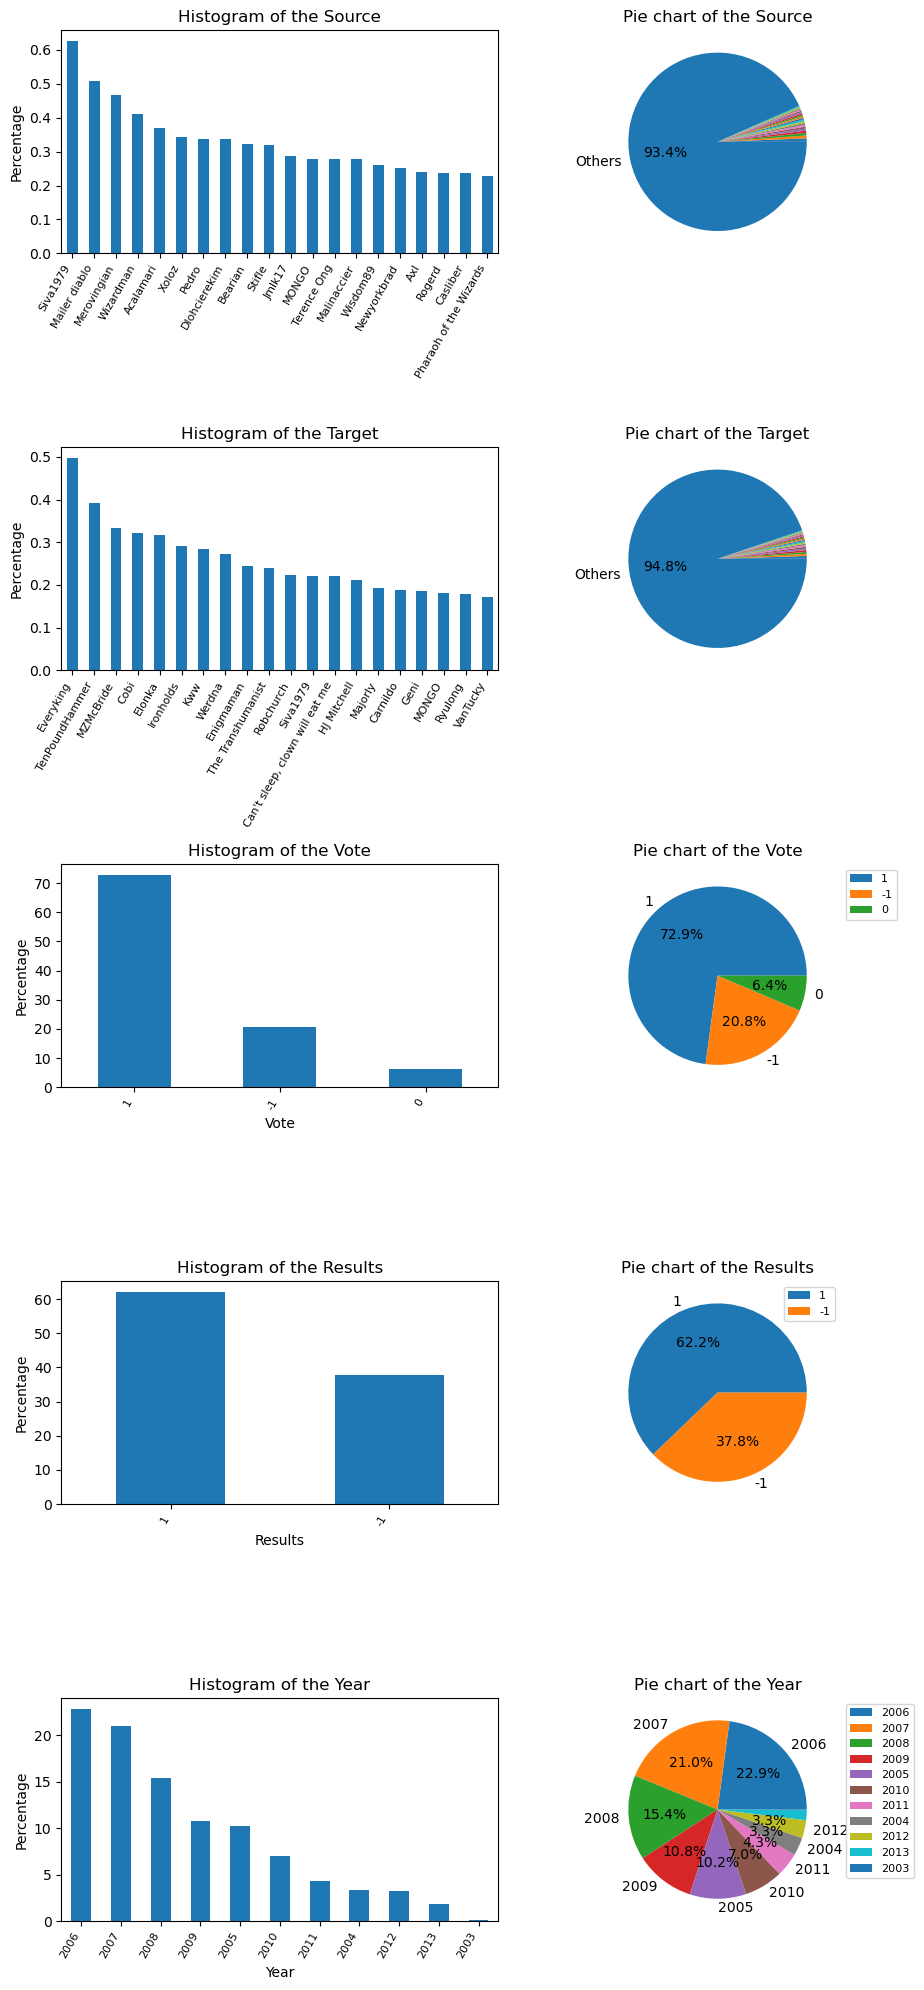

In [12]:
warnings.filterwarnings('ignore')
categorical_cols = ['Source', 'Target']
value_cols = ['Vote', 'Results', 'Year']
all_cols = categorical_cols + value_cols
n_top = 20
fig, axes = plt.subplots(len(all_cols), 2, figsize=(10,4*len(all_cols)))
for i, col in enumerate(all_cols):
    ax1 = axes[(2*i) // 2, (2*i) % 2]
    ax2 = axes[(2*i+1) // 2, (2*i+1) % 2]
    data = df[~df[col].isna()]
    if col in categorical_cols:
        top_n = pd.Series(data[col].value_counts().iloc[:n_top])
        others = pd.Series(data[col].value_counts().iloc[n_top:].sum(), index=['Others'])
        value_counts = pd.concat([top_n, others])
        
    elif col in value_cols:
        value_counts = data[col].value_counts()
    
    value_counts = 100*value_counts/np.sum(value_counts)
    labels = value_counts.index.to_list()

    # Count plot
    chart = value_counts[value_counts.index != 'Others'].plot(kind='bar', ax=ax1) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right', fontsize = 8)
    ax1.set_title('Histogram of the ' + col)
    ax1.set_ylabel('Percentage')
    
    # Pie chart
    wedges, texts, autotexts = ax2.pie(value_counts, labels = labels, autopct='%1.1f%%')
    threshold = 2
    for label, pct_label in zip(texts, autotexts):
        pct_value = pct_label.get_text().rstrip('%')
        if float(pct_value) < threshold:
            label.set_text('')
            pct_label.set_text('')
    
    #if too much labels, don't show legend
    if len(labels) < 12:
        ax2.legend(bbox_to_anchor=(1.05, 1), fontsize = 8)
    ax2.set_title('Pie chart of the ' + col)

fig.tight_layout()    
plt.show()